In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%ls

 Volume in drive C has no label.
 Volume Serial Number is 6ABD-2CEE

 Directory of C:\Users\kiet\Desktop\Notebook\Project 1

07/19/2019  03:42 PM    <DIR>          .
07/19/2019  03:42 PM    <DIR>          ..
07/18/2019  01:49 AM    <DIR>          .ipynb_checkpoints
07/14/2019  11:24 PM         1,078,608 country.lat_lon.csv
07/18/2019  12:31 AM           137,769 gdp_world.csv
07/11/2019  10:23 PM            36,905 Human Development Index (HDI).csv
07/13/2019  10:11 PM           124,804 human development index 2.csv
07/13/2019  09:49 PM            76,910 human-development-index-escosura (1).csv
07/17/2019  04:57 PM    <DIR>          images
07/17/2019  12:32 PM            47,368 imf_gdp.csv
07/14/2019  12:25 AM           588,208 Project1.ipynb
07/11/2019  10:43 PM            29,469 Project1-Notebook.ipynb
07/19/2019  02:43 PM           346,712 Project1-USandWorld.ipynb
07/18/2019  12:44 AM         4,225,199 Project1-USandWorldandHdi - Chris.ipynb
07/18/2019  01:07 AM         3,444,291 Pro

In [2]:
# Import csv files
usaidtop50_df = pd.read_csv('USAidTop50.csv')
worldbanktop50_df = pd.read_csv('worldbank50.csv')
hdi_50 = pd.read_csv('human development index 2.csv')
gdp_50 = pd.read_csv('imf_gdp.csv')
gdp = pd.read_csv('gdp_world.csv')

In [3]:
# subset columns in US Dataframe
usaidtop50_df = usaidtop50_df[['country_name', 'region_name', 'implementing_agency_name', 'funding_agency_name',
                                       'fiscal_year', 'current_amount']]
# Clean up US Aid data for merge
usaidtop50_hdi = usaidtop50_df.copy(deep = True)
usaidtop50_hdi = usaidtop50_hdi[['country_name','fiscal_year', 'current_amount']]
usaidtop50_hdi = usaidtop50_hdi.rename(columns = {'fiscal_year': "year", 'current_amount': 'US_Aid'})
usaidtop50_hdi = usaidtop50_hdi.groupby(['country_name', 'year']).agg({
    'US_Aid': 'sum'
}).reset_index()
usaidtop50_hdi.head()

country_name  year      US_Aid
0  Afghanistan  2001    40790880
1  Afghanistan  2002   400296704
2  Afghanistan  2003   703345174
3  Afghanistan  2004  1240018125
4  Afghanistan  2005  1661363694

In [4]:
top_ten = usaidtop50_hdi.groupby('country_name').agg({
    'US_Aid':'sum'
}).sort_values('US_Aid', ascending = False )
top_ten = top_ten.reset_index()
top_ten.country_name = top_ten.country_name.str.replace('/',' ')
view_list = top_ten['country_name'].to_list()
view_list.remove('West Bank Gaza')
view_list

['World',
 'Afghanistan',
 'Iraq',
 'Israel',
 'Egypt',
 'Jordan',
 'Pakistan',
 'Ethiopia',
 'Sub-Saharan Africa Region',
 'Russia',
 'Colombia',
 'Kenya',
 'Sudan (former)',
 'Nigeria',
 'Uganda',
 'South Africa',
 'Tanzania',
 'Haiti',
 'Middle East and North Africa Region',
 'Congo (Kinshasa)',
 'Mozambique',
 'South Sudan',
 'Syria',
 'Indonesia',
 'Zambia',
 'Ukraine',
 'Philippines',
 'Somalia',
 'Latin America and Caribbean Region',
 'Bangladesh',
 'Georgia',
 'Lebanon',
 'Liberia',
 'Mexico',
 'Malawi',
 'Poland',
 'Peru',
 'Asia Region',
 'Yemen',
 'Ghana',
 'Mali',
 'India',
 'Zimbabwe',
 'Senegal',
 'Guatemala',
 'Rwanda',
 'El Salvador',
 'Honduras',
 'Bolivia']

In [5]:
# Rename the columns to match the column names in usaidtop50_df
# Clean up years to match as well

hdi_50 = hdi_50[hdi_50.Year > 2000]
hdi_50_df = hdi_50.rename(columns={'Entity': 'country_name',
                      ' ((0-1; higher values are better))': 'HDI',
                      'Year': 'fiscal_year'})
hdi_50.head()

Entity Code  Year   ((0-1; higher values are better))
2  Afghanistan  AFG  2002                               0.373
3  Afghanistan  AFG  2003                               0.383
4  Afghanistan  AFG  2004                               0.398
5  Afghanistan  AFG  2005                               0.408
6  Afghanistan  AFG  2006                               0.417

In [6]:
# Merge the us data with hdi data at country name
# Clean table relating US Aid and HDI for years after 2000
# combined the data to corresponding years

combined_df = pd.merge(hdi_50_df, usaidtop50_hdi, how = 'left', on = 'country_name')
combined_df = combined_df.loc[combined_df['fiscal_year'] == combined_df['year']]
del combined_df['fiscal_year']
combined_df.head()

country_name Code    HDI    year        US_Aid
1   Afghanistan  AFG  0.373  2002.0  4.002967e+08
21  Afghanistan  AFG  0.383  2003.0  7.033452e+08
41  Afghanistan  AFG  0.398  2004.0  1.240018e+09
61  Afghanistan  AFG  0.408  2005.0  1.661364e+09
81  Afghanistan  AFG  0.417  2006.0  3.357301e+09

In [7]:
# Fix world bank data so there is one record per year after 2000 per country
# renamed columns and made them consistent
worldbanktop50 = worldbanktop50_df.query('boardapprovaldate > 2000')
worldbanktop50 = worldbanktop50[['regionname', 'countryname2', 'boardapprovaldate', 'totalamt']]
worldbanktop50 = worldbanktop50.rename(columns = {'countryname2':'country_name','boardapprovaldate': "year", 'totalamt': 'WorldBank_Aid'})
worldbanktop50 = worldbanktop50.groupby(['country_name', 'year']).agg({
    'WorldBank_Aid':'sum'
}).reset_index()
worldbanktop50.head()

country_name    year  WorldBank_Aid
0  Afghanistan  2002.0      100000000
1  Afghanistan  2003.0      403200000
2  Afghanistan  2004.0      250000000
3  Afghanistan  2005.0      220000000
4  Afghanistan  2006.0      280000000

In [8]:
# merge US and HDI data with world data
# Aid in millions
combined_df_complete = pd.merge(combined_df, worldbanktop50, how = 'left', left_on = ['country_name', 'year'], right_on = ['country_name','year'])
combined_df_complete.US_Aid = combined_df_complete.US_Aid/1000000
combined_df_complete.WorldBank_Aid = combined_df_complete.WorldBank_Aid/1000000
combined_df_complete.country_name = combined_df_complete['country_name'].str.replace('/',' ')

In [9]:
combined_df_complete.head()

country_name Code    HDI    year       US_Aid  WorldBank_Aid
0  Afghanistan  AFG  0.373  2002.0   400.296704          100.0
1  Afghanistan  AFG  0.383  2003.0   703.345174          403.2
2  Afghanistan  AFG  0.398  2004.0  1240.018125          250.0
3  Afghanistan  AFG  0.408  2005.0  1661.363694          220.0
4  Afghanistan  AFG  0.417  2006.0  3357.300934          280.0

In [10]:
# Plot US data vs. HDI data
def plot_US_HDI(cname):
    t = combined_df_complete[combined_df_complete.country_name.str.match(f'{cname}')].year
    data1 = combined_df_complete[combined_df_complete.country_name.str.match(f'{cname}')].US_Aid
    data3 = combined_df_complete[combined_df_complete.country_name.str.match(f'{cname}')].HDI
    fig, ax1 = plt.subplots()

    color = 'tab:red'

    ax1.set_xlabel('year')
    ax1.set_ylabel('US Aid (in millions USD)', color=color)
    ax1.plot(t, data1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('HDI', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data3, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'US Aid and HDI for {cname}')
    print(cname)
    plt.savefig(f'images/{cname} - US.png')
    plt.show()


In [11]:
# Plot World Bank Data vs HDI data
def plot_World_HDI(cname):
    t = combined_df_complete[combined_df_complete.country_name.str.match(f'{cname}')].year
    data2 = combined_df_complete[combined_df_complete.country_name.str.match(f'{cname}')].WorldBank_Aid
    data3 = combined_df_complete[combined_df_complete.country_name.str.match(f'{cname}')].HDI

    fig, ax1 = plt.subplots()

    color = 'tab:red'

    ax1.set_xlabel('year')
    ax1.set_ylabel('World Aid (in Millions USD)', color=color)
    ax1.plot(t, data2, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('HDI', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, data3, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'World Aid and HDI for {cname}')
    print(cname)
    plt.savefig(f'images/{cname} - World.png')
    plt.show()


World


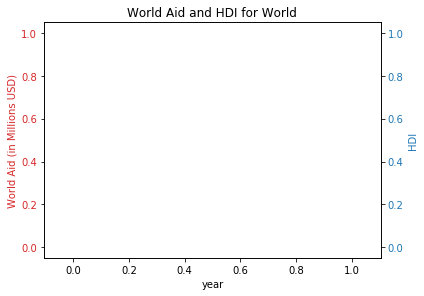

World


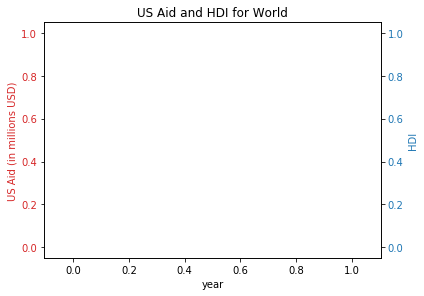

Afghanistan


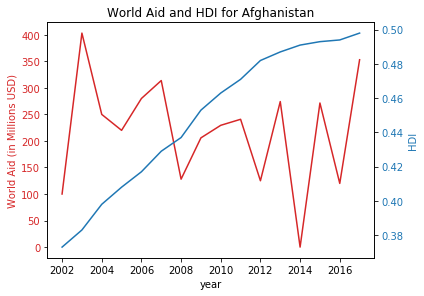

Afghanistan


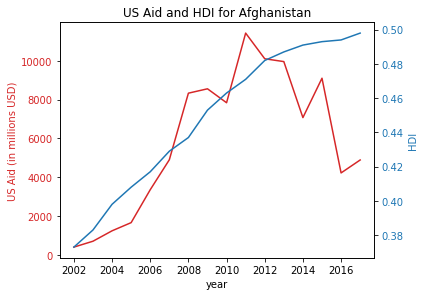

Iraq


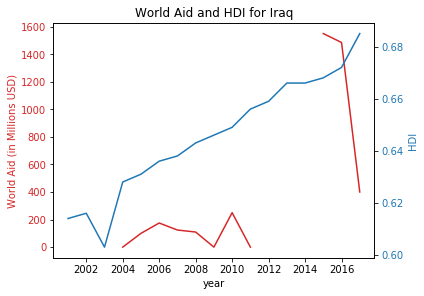

Iraq


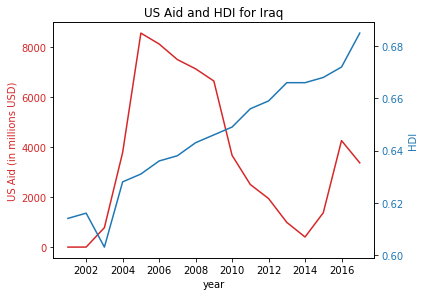

Israel


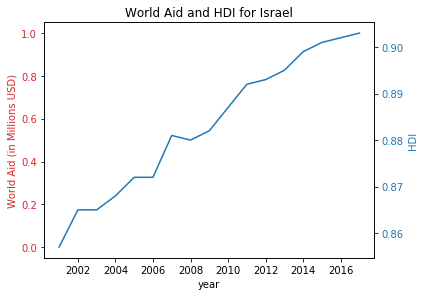

Israel


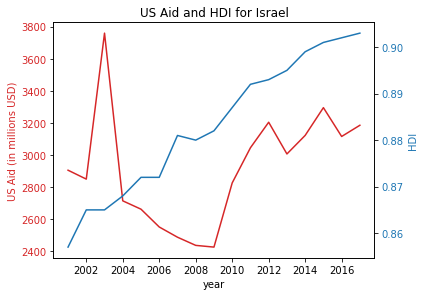

Egypt


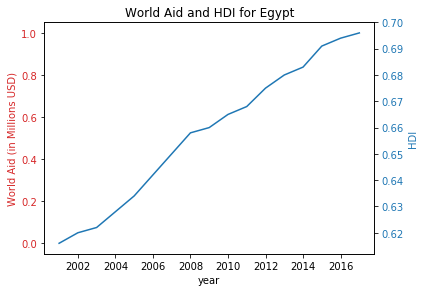

Egypt


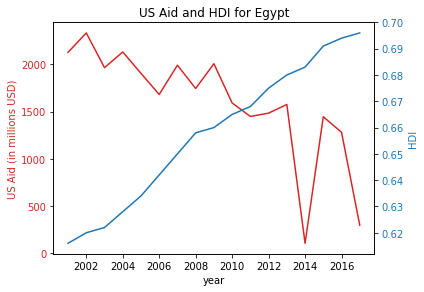

Jordan


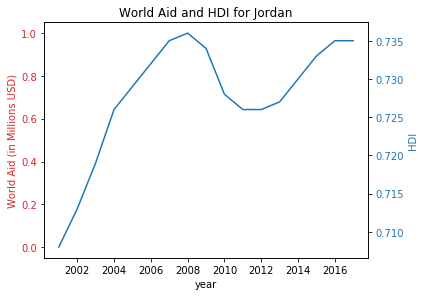

Jordan


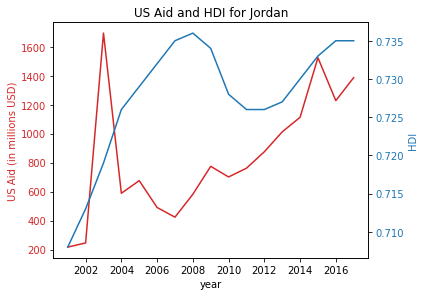

Pakistan


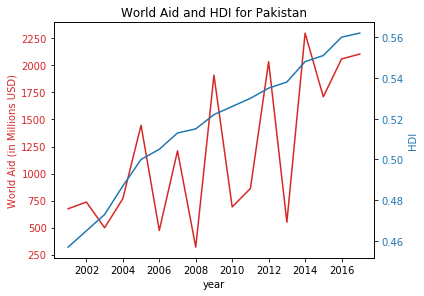

Pakistan


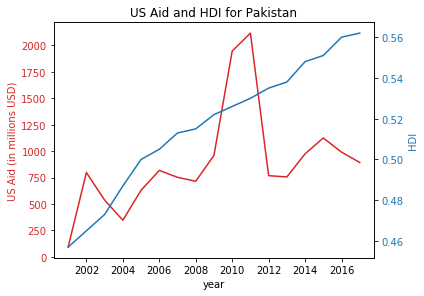

Ethiopia


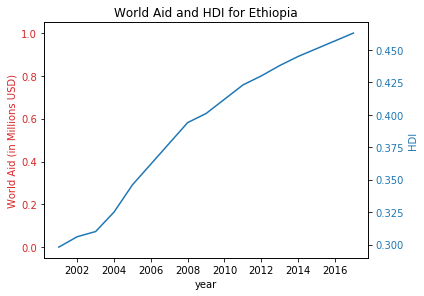

Ethiopia


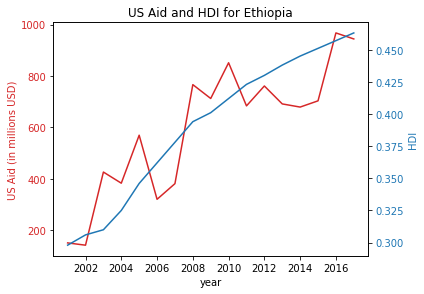

Sub-Saharan Africa Region


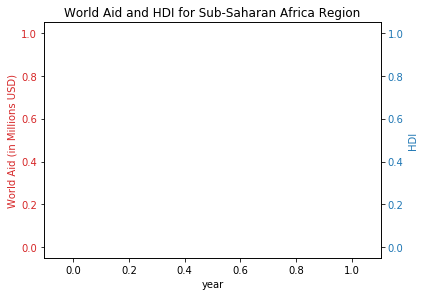

Sub-Saharan Africa Region


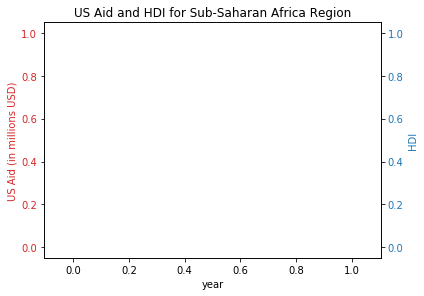

Russia


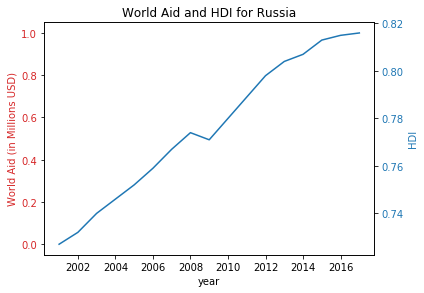

Russia


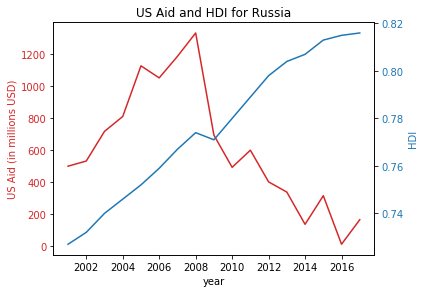

Colombia


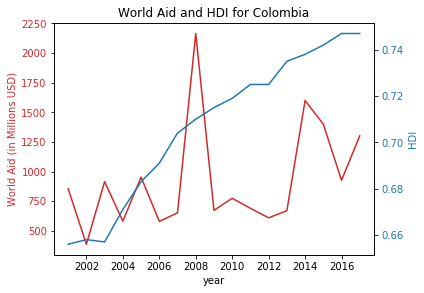

Colombia


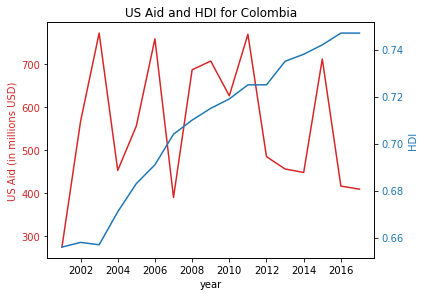

Kenya


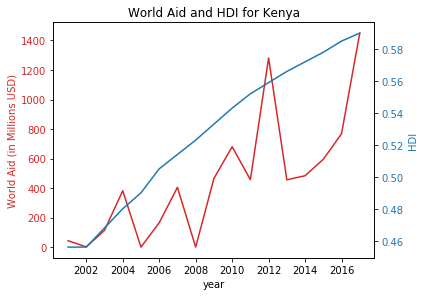

Kenya


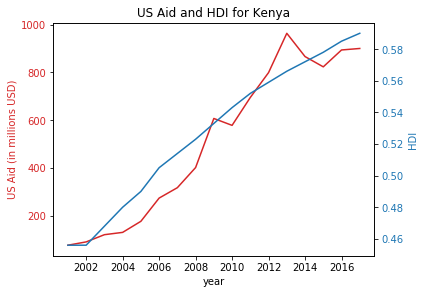

Sudan (former)


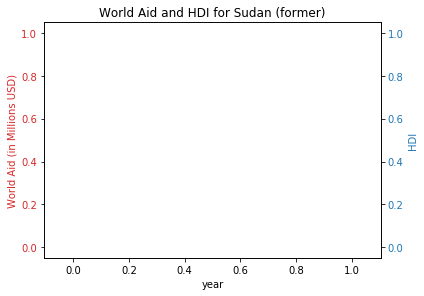

Sudan (former)


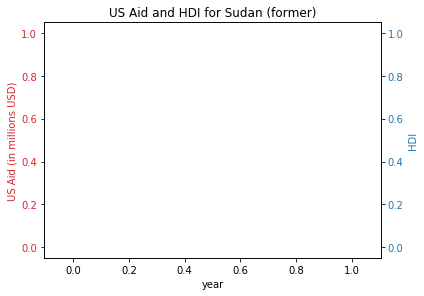

Nigeria


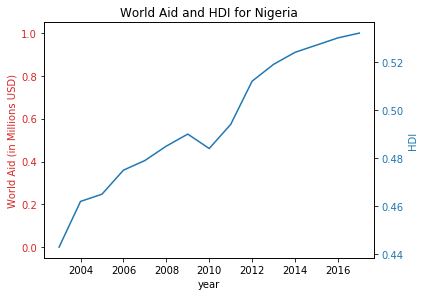

Nigeria


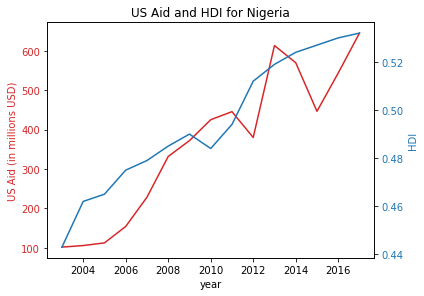

Uganda


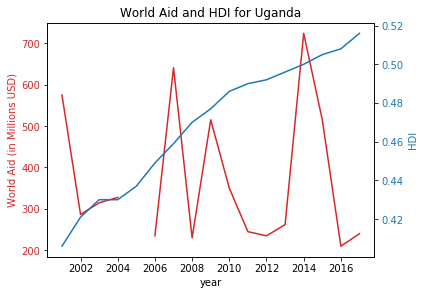

Uganda


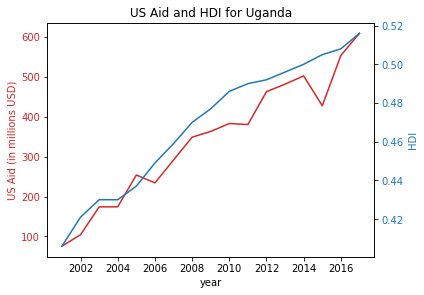

South Africa


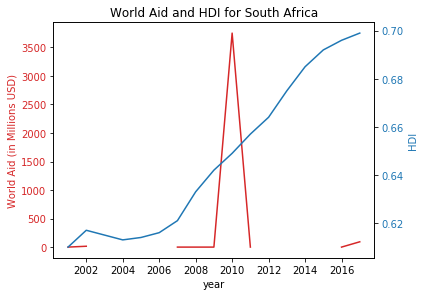

South Africa


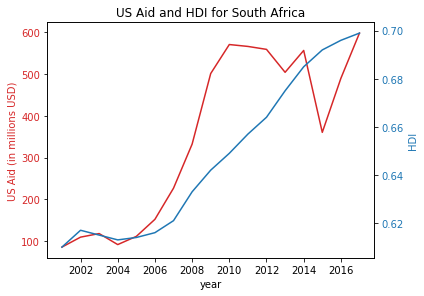

Tanzania


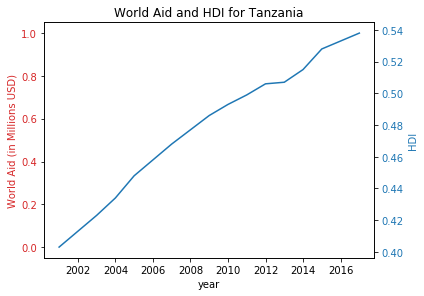

Tanzania


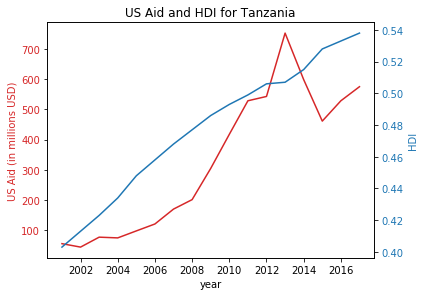

Haiti


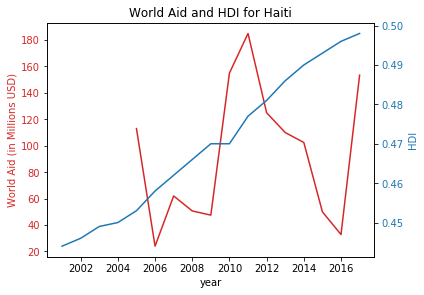

Haiti


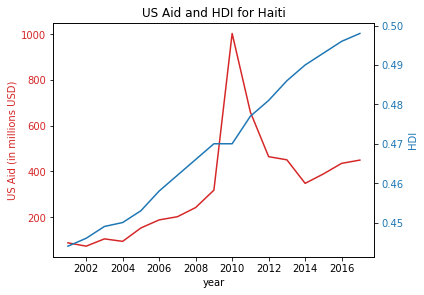

Middle East and North Africa Region


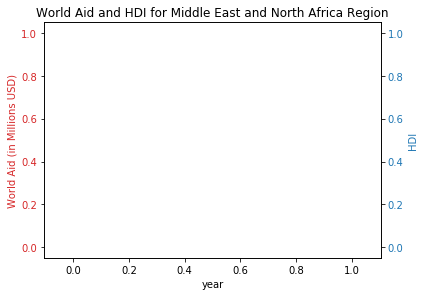

Middle East and North Africa Region


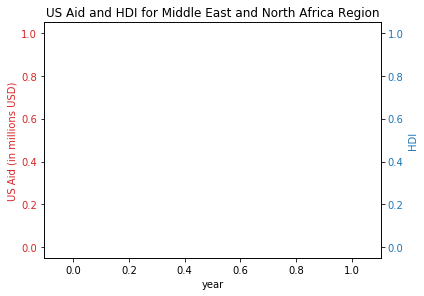

Congo (Kinshasa)


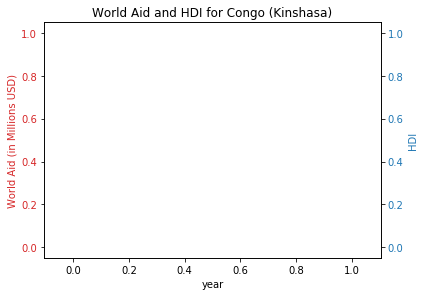

Congo (Kinshasa)


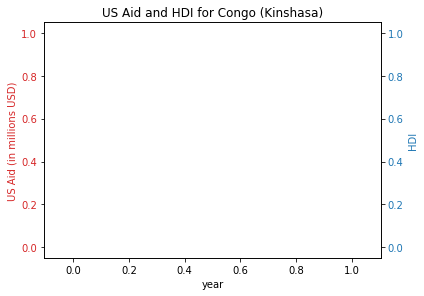

Mozambique


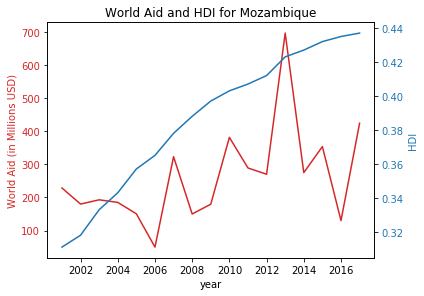

Mozambique


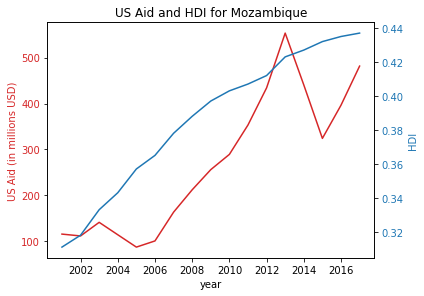

South Sudan


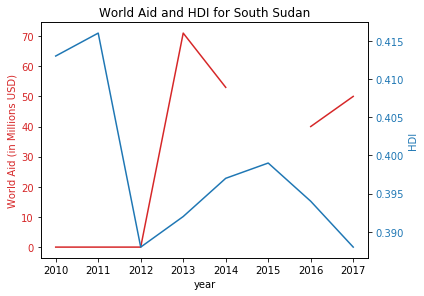

South Sudan


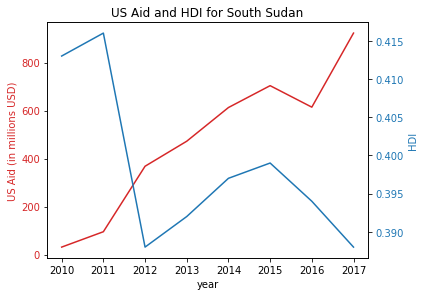

Syria


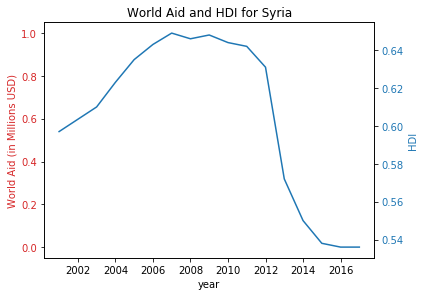

Syria


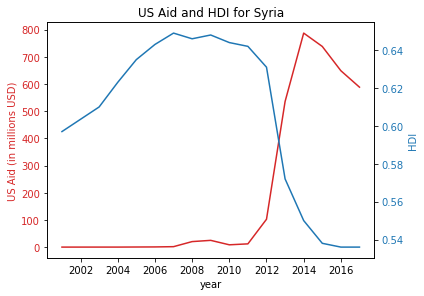

Indonesia


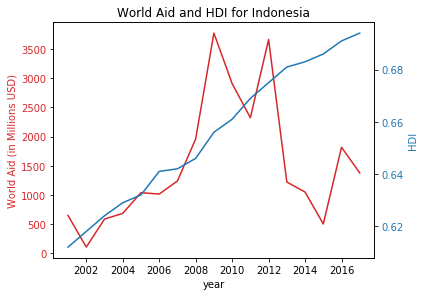

Indonesia


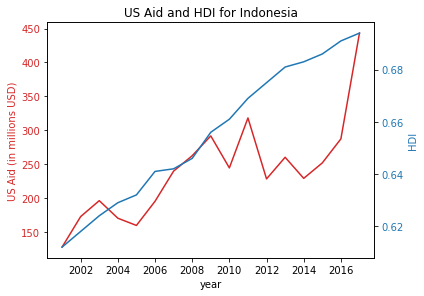

Zambia


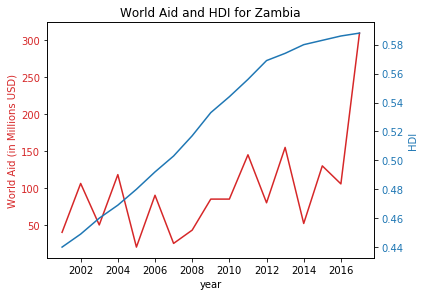

Zambia


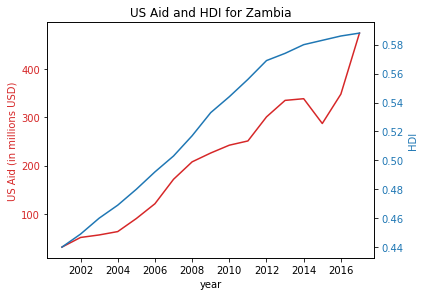

Ukraine


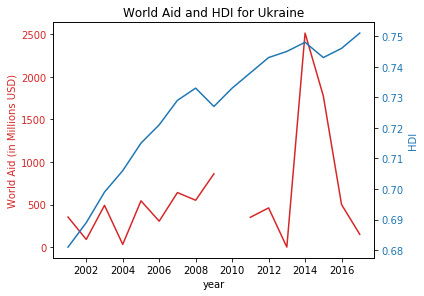

Ukraine


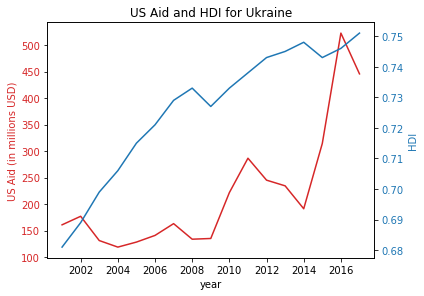

Philippines


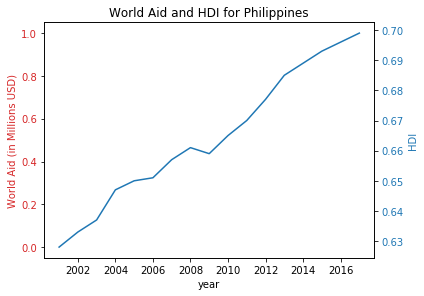

Philippines


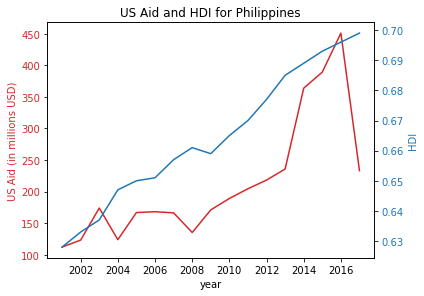

Somalia


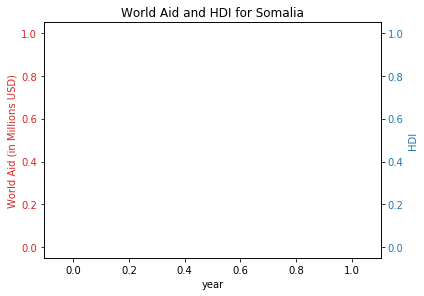

Somalia


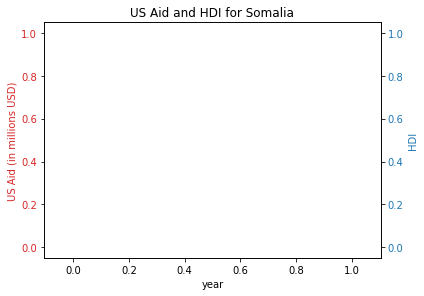

Latin America and Caribbean Region


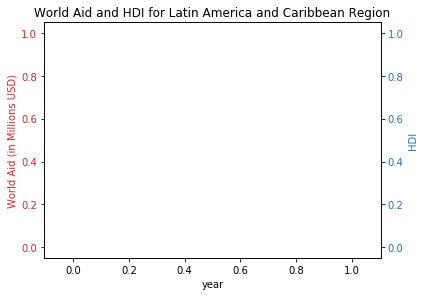

Latin America and Caribbean Region


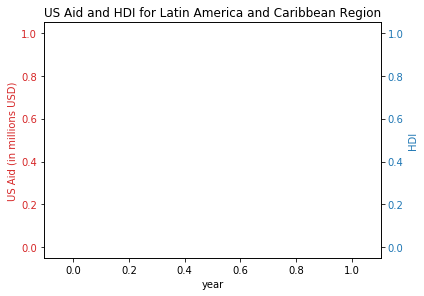

Bangladesh


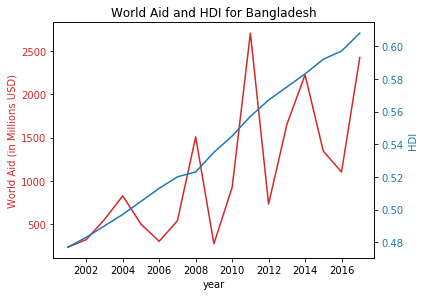

Bangladesh


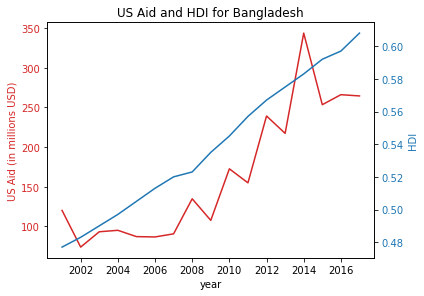

Georgia


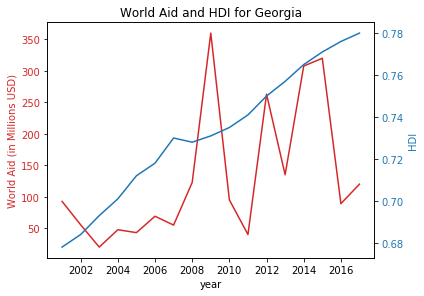

Georgia


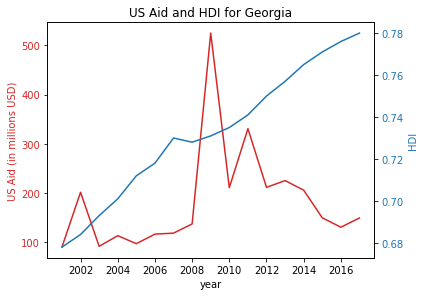

Lebanon


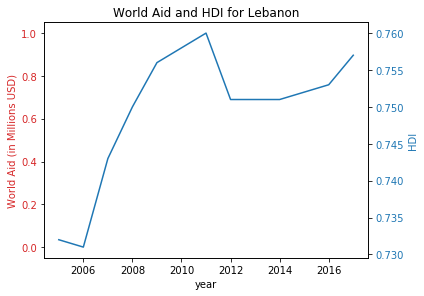

Lebanon


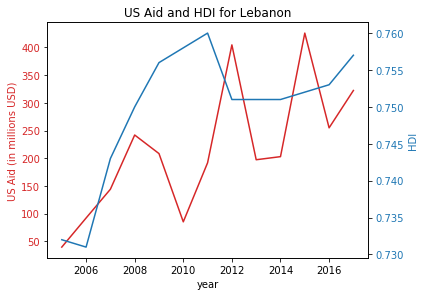

Liberia


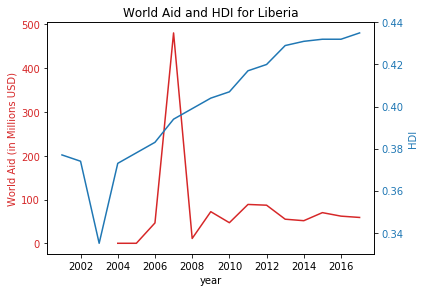

Liberia


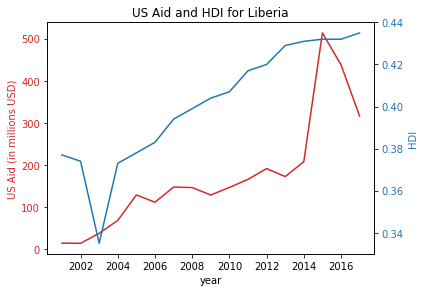

Mexico


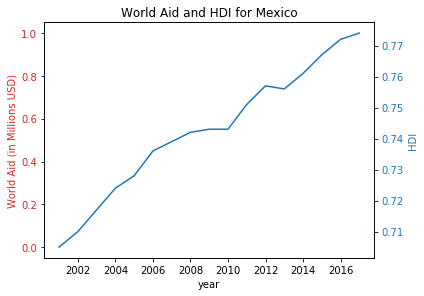

Mexico


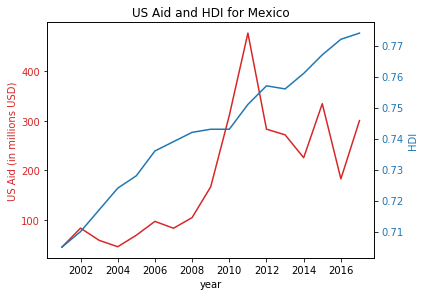

Malawi


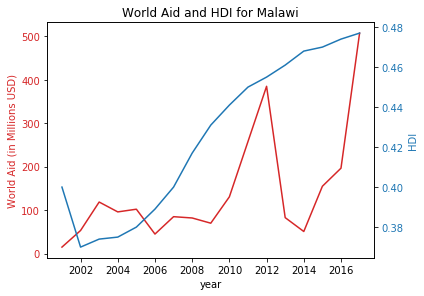

Malawi


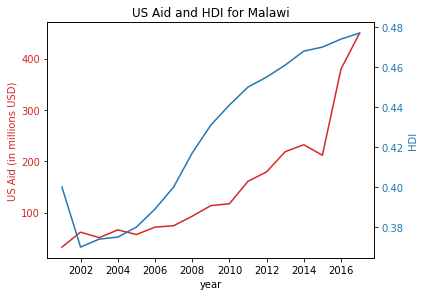

Poland


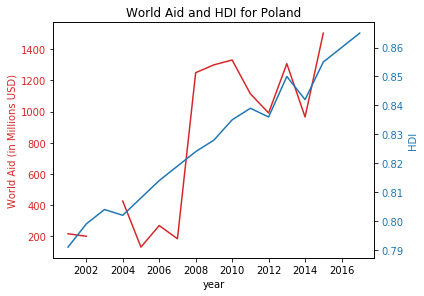

Poland


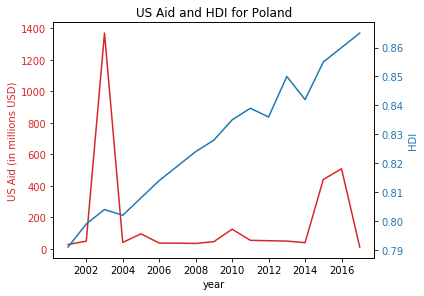

Peru


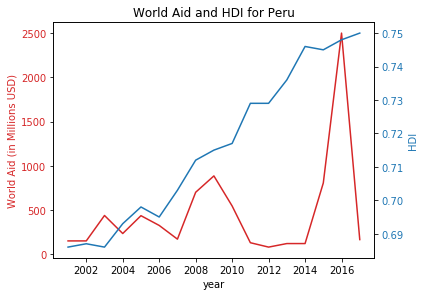

Peru


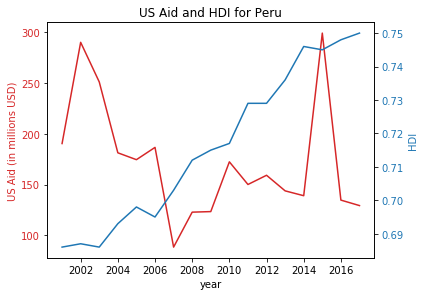

Asia Region


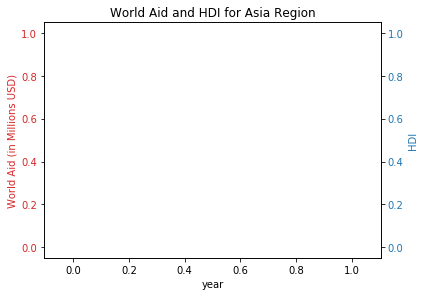

Asia Region


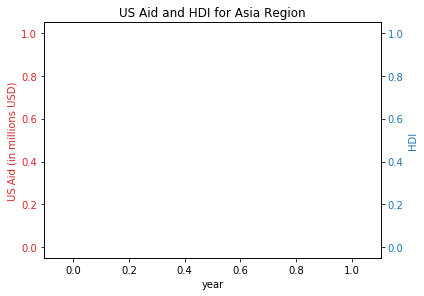

Yemen


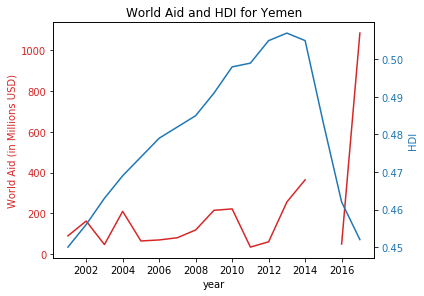

Yemen


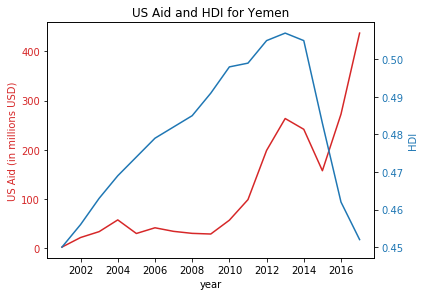

Ghana


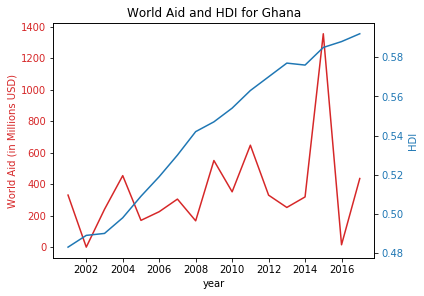

Ghana


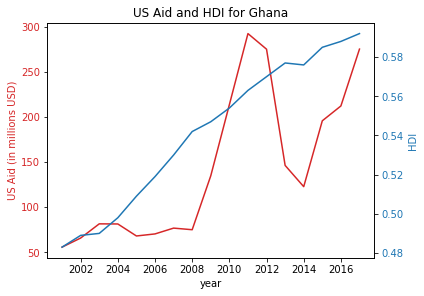

Mali


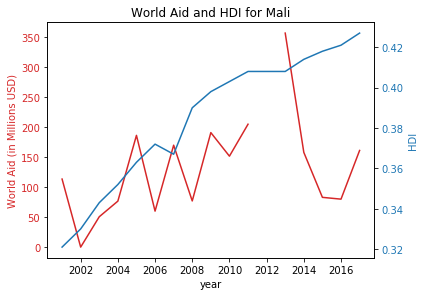

Mali


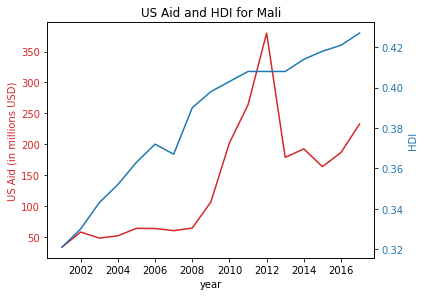

India


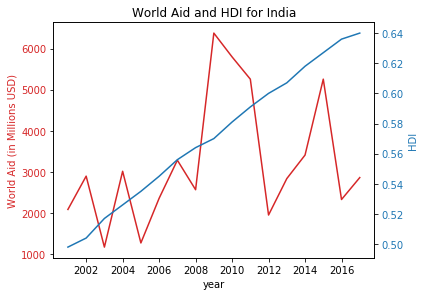

India


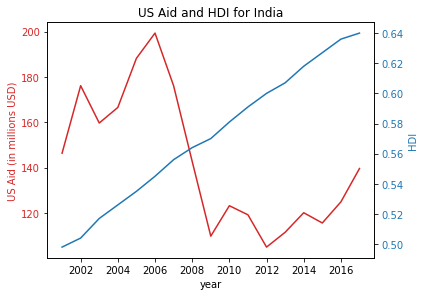

Zimbabwe


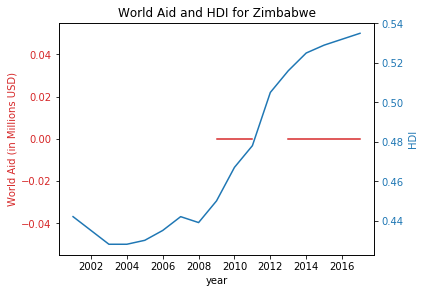

Zimbabwe


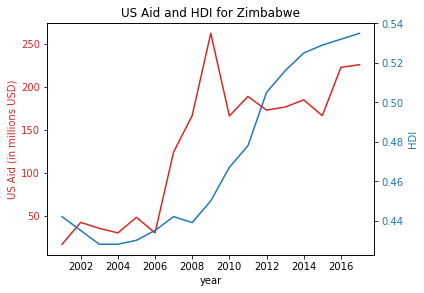

Senegal


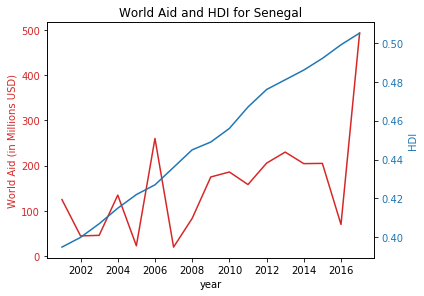

Senegal


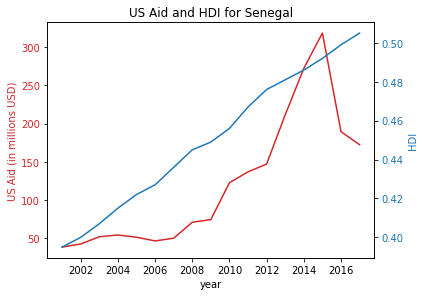

Guatemala


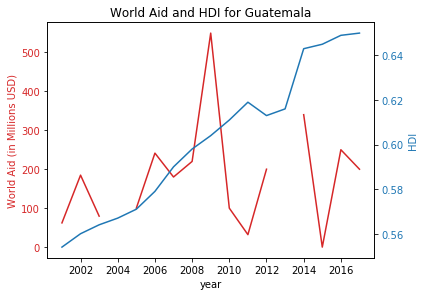

Guatemala


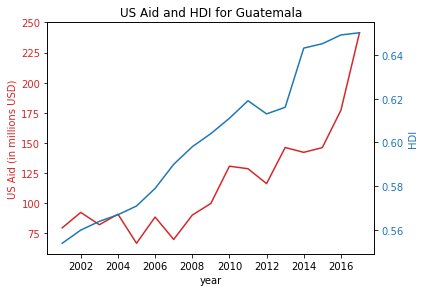

Rwanda


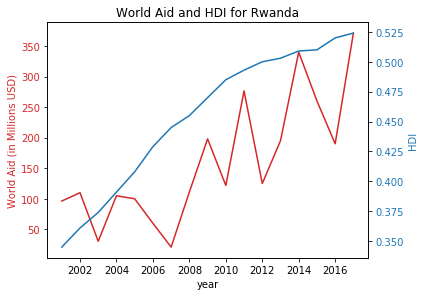

Rwanda


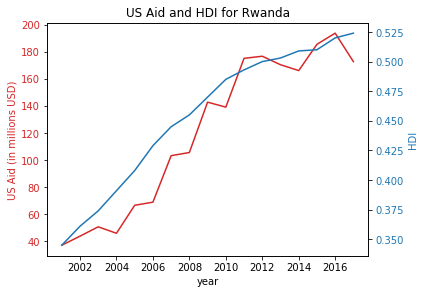

El Salvador


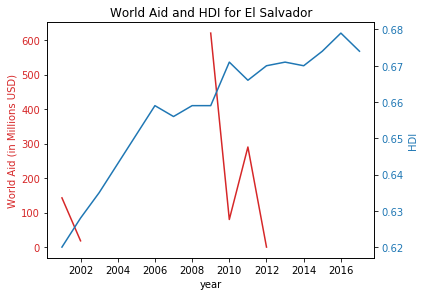

El Salvador


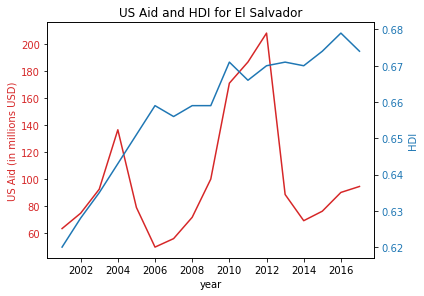

Honduras


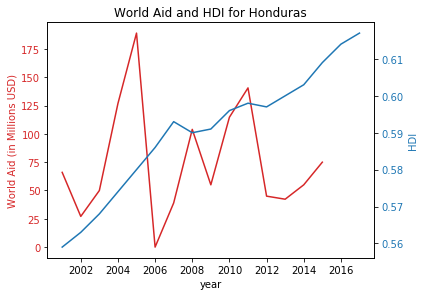

Honduras


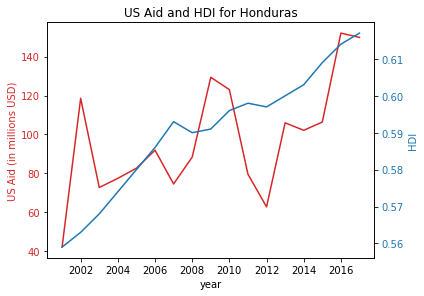

Bolivia


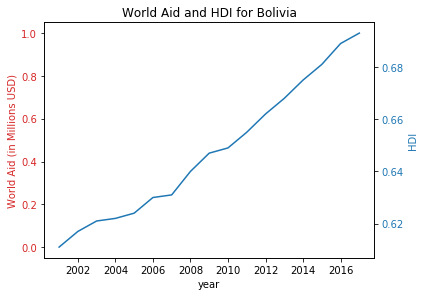

Bolivia


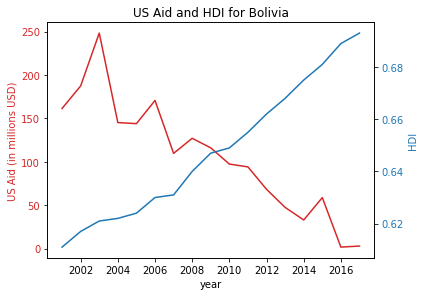

In [12]:
for country in view_list:
    plot_World_HDI(country)
    plot_US_HDI(country)
    

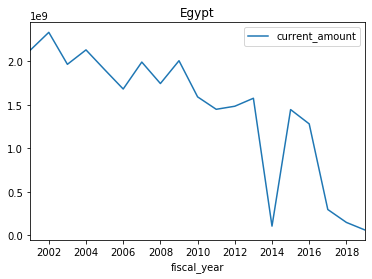

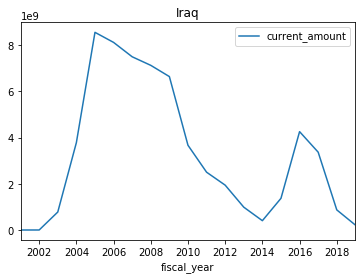

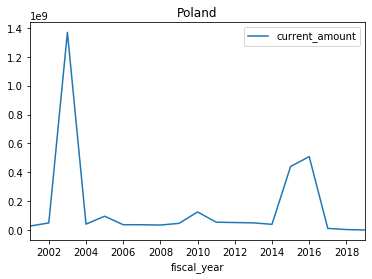

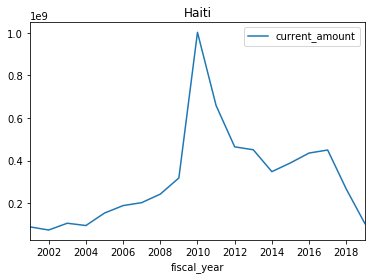

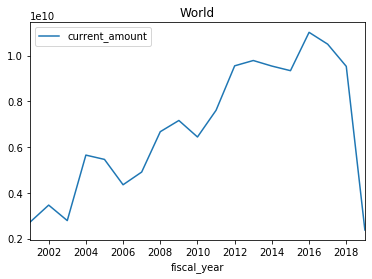

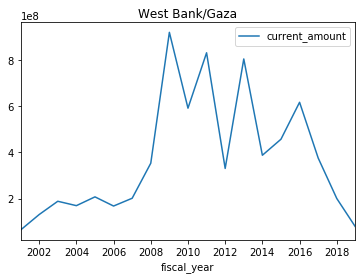

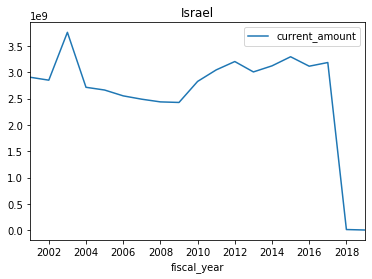

In [13]:
# Line Plot total US aid to countries
usaidtop50_df.fiscal_year = usaidtop50_df.fiscal_year.astype(int)

def show_plot_usaid(cname):
    return usaidtop50_df.query(f'country_name == "{cname}"').groupby('fiscal_year').agg({
        "current_amount": 'sum'
    }).plot(kind='line', title=cname)

show_plot_usaid('Egypt')
show_plot_usaid('Iraq')
show_plot_usaid('Poland')
show_plot_usaid('Haiti')
show_plot_usaid('World')
show_plot_usaid('West Bank/Gaza')
show_plot_usaid('Israel')

In [14]:
usaidtop50_df.head(10)

country_name                   region_name implementing_agency_name  \
0  Afghanistan        South and Central Asia    Department of Defense   
1  Afghanistan        South and Central Asia    Department of Defense   
2  Afghanistan        South and Central Asia    Department of Defense   
3  Afghanistan        South and Central Asia    Department of Defense   
4  Afghanistan        South and Central Asia    Department of Defense   
5  Afghanistan        South and Central Asia    Department of Defense   
6  Afghanistan        South and Central Asia    Department of Defense   
7  Afghanistan        South and Central Asia    Department of Defense   
8         Iraq  Middle East and North Africa    Department of Defense   
9         Iraq  Middle East and North Africa    Department of Defense   

      funding_agency_name  fiscal_year  current_amount  
0  Department of the Army         2011      7840175215  
1  Department of the Army         2013      7764310985  
2  Department of the Army         2015      6775000000  
3  Department of the Army         2012      6642737870  
4  Department of the Army         2008      6255388125  
5  Department of the Army         2009      5716222697  
6  Department of the Army         2014      4658823362  
7  Department of the Army         2010      4467783965  
8  Department of the Army         2007      3820094389  
9  Department of the Army         2008      3693616400

In [15]:
#US aid grouped by agency giving aid
aid_by_agency = usaidtop50_df.groupby(['country_name','implementing_agency_name']).agg({
    'current_amount':'sum'
})
aid_by_agency = aid_by_agency.reset_index()
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('Department of',"")
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('Health and Human Services',"HHS")
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('U.S. Agency for International Development',"US_AID")
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('Trade and Development Agency',"Trade_Development")
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('the',"")
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('Environmental Protection Agency',"EPA")
aid_by_agency.implementing_agency_name = aid_by_agency.implementing_agency_name.str.replace('Federal Trade Commission',"FTC")
aid_by_agency.current_amount = aid_by_agency.current_amount/1000000

aid_by_agency.implementing_agency_name.unique()

array([' Agriculture', ' Commerce', ' Defense', ' Energy', ' HHS',
       ' Homeland Security', ' Justice', ' Labor', ' State',
       ' Transportation', '  Army', '  Treasury', 'Trade_Development',
       'US_AID', '  Interior', 'EPA', '  Navy', 'Peace Corps',
       'Inter-American Foundation', 'Millennium Challenge Corporation',
       '  Air Force', 'FTC', 'African Development Foundation',
       'National Science Foundation', 'Open World Leadership Center',
       'Overseas Private Investment Corporation',
       'United States Institute of Peace'], dtype=object)

In [16]:
color_dict = {'Agriculture': 'red',
              'Commerce':'green',
              'Defence':'blue',
              'Energy':'yellow',
              'HHS': 'blue',
             'Homeland Security':'orange',
             'Justice':'cyan',
             'Labor':'brown',
             'State':'black',
             'Transportation':'magenta',
              'Army':'silver',
              'Treasury':'grey',
              'Trade_Development':'pink',
            'US_AID':'salmon',
              'Interior':'linen',
              'EPA':'limegreen',
              'Navy':'gold',
              'Peace Corps':'navy',
           'Inter-American Foundation':'indigo',
              'Millennium Challenge Corporation':'orchid',
           'Air Force':'tan',
              'FTC':'darkred',
              'African Development Foundation':'greenyellow',
           'National Science Foundation':'teal',
              'Open World Leadership Center':'olivedrab',
       'Overseas Private Investment Corporation':'slategray',
       'United States Institute of Peace':'tomato'}
aid_by_agency['color_agency'] = aid_by_agency.implementing_agency_name.map(lambda x: color_dict.get(x.strip(), 'purple'))
aid_by_agency.query('country_name == "West Bank Gaza"')


Empty DataFrame
Columns: [country_name, implementing_agency_name, current_amount, color_agency]
Index: []

In [17]:
#Graph US aid by agency for a country
def plot_aid_by_agency(cname):
    dept_names = aid_by_agency.query(f'country_name == "{cname}"')['implementing_agency_name'].to_list()
    aid_filtered = aid_by_agency.query(f'country_name == "{cname}"')   
    aid_filtered.plot(kind = 'bar', x = 'implementing_agency_name',y = 'current_amount', 
                      color = aid_filtered.color_agency,legend = False)
    plt.xlabel('Agency')
    plt.ylabel('Aid (in Millions USD)')
    plt.title(f'Aid by Agency for {cname}')
    print(cname)
    plt.savefig(f'images/{cname} - AidByAgency.png')
    plt.show()




World


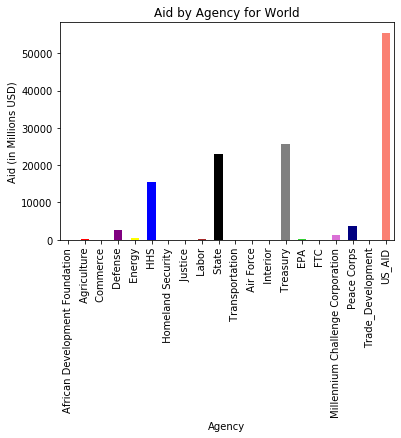

Afghanistan


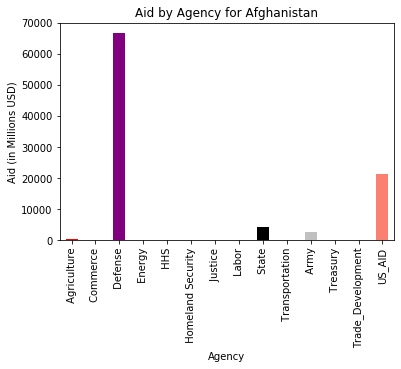

Iraq


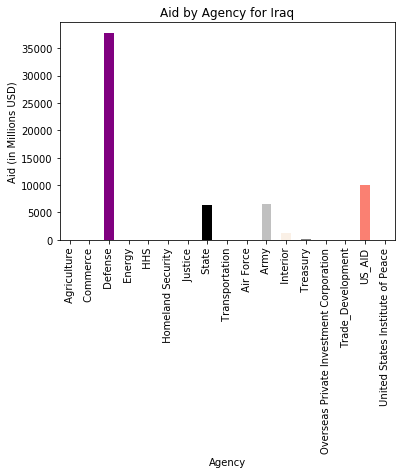

Israel


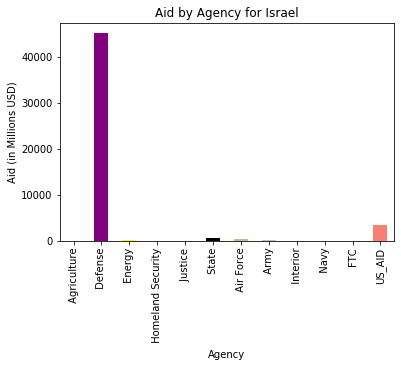

Egypt


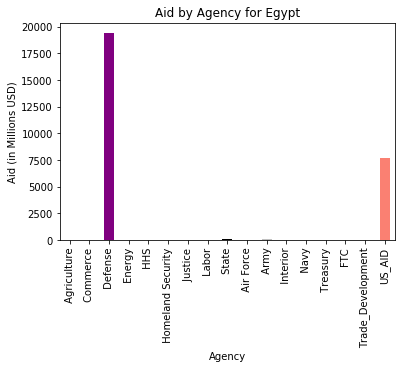

Jordan


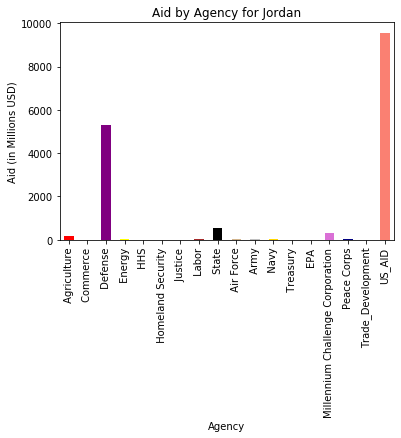

Pakistan


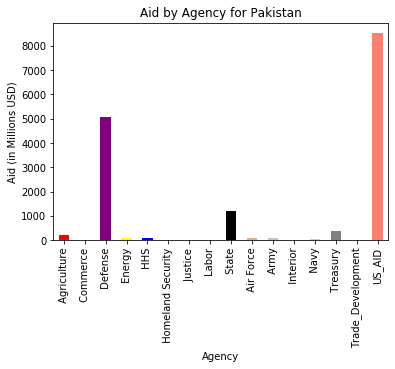

Ethiopia


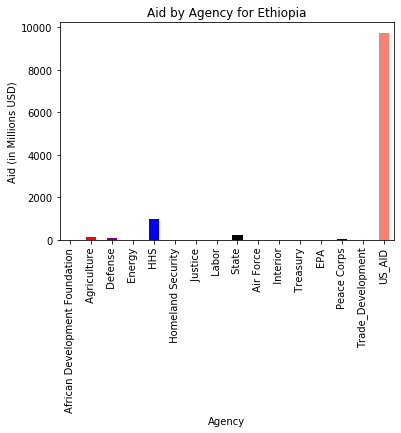

Sub-Saharan Africa Region


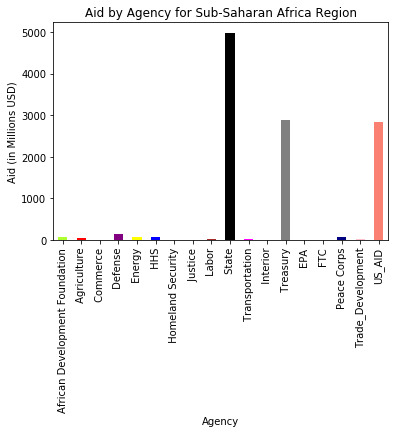

Russia


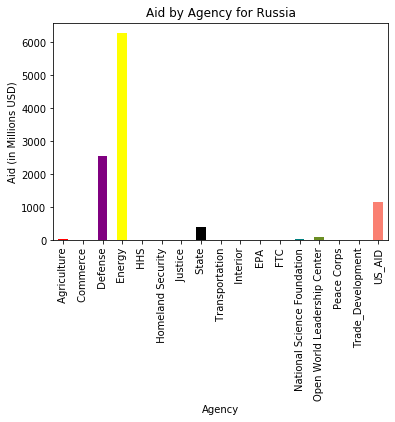

Colombia


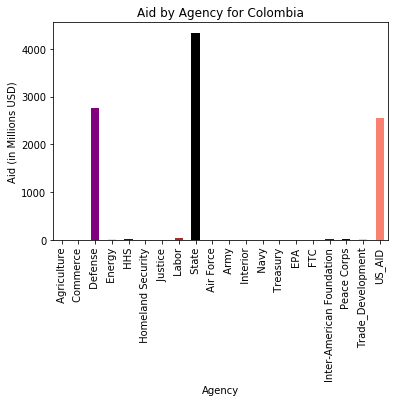

Kenya


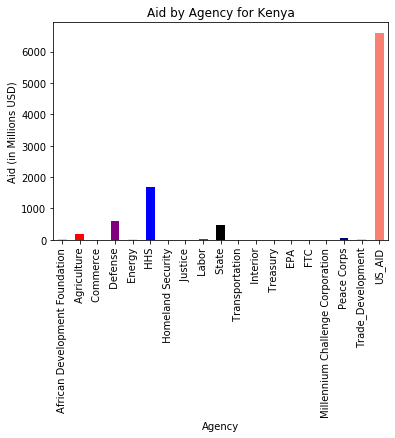

Sudan (former)


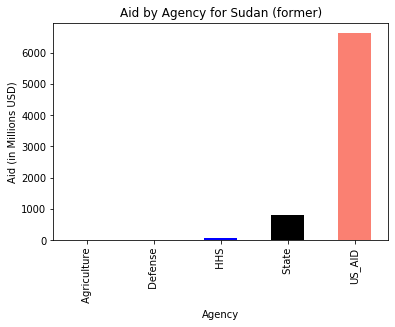

Nigeria


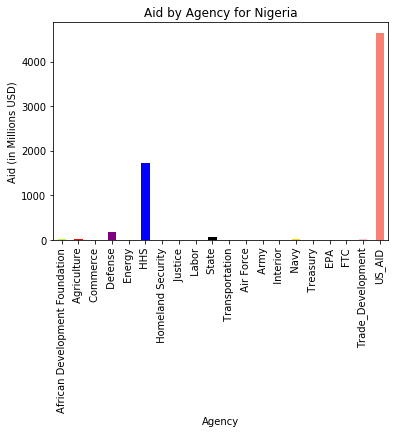

Uganda


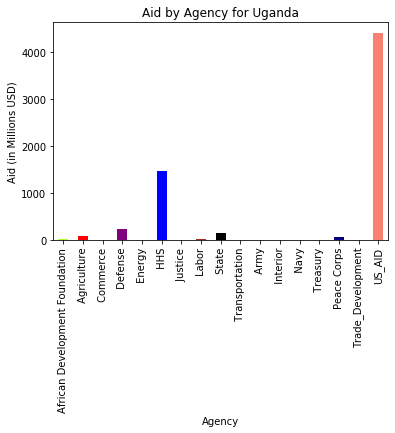

South Africa


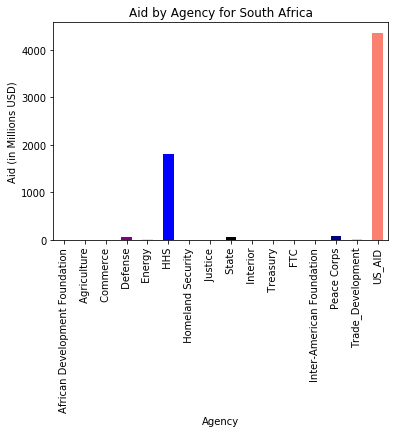

Tanzania


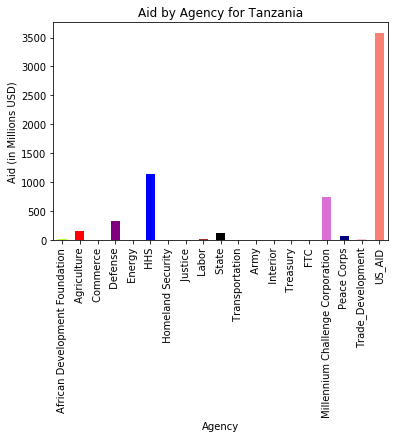

Haiti


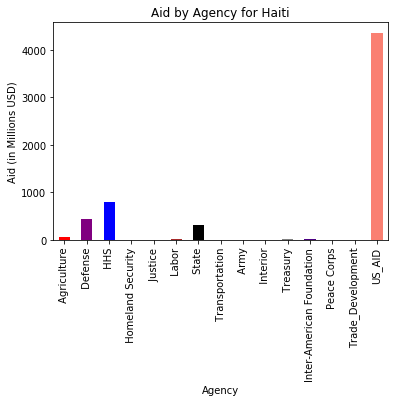

Middle East and North Africa Region


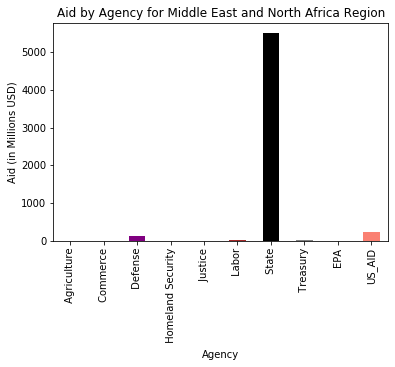

Congo (Kinshasa)


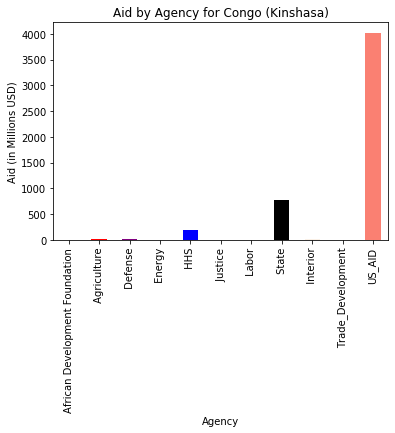

Mozambique


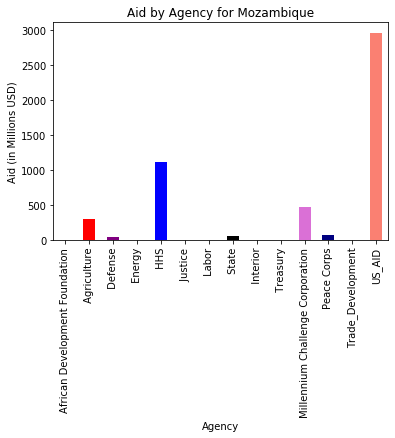

South Sudan


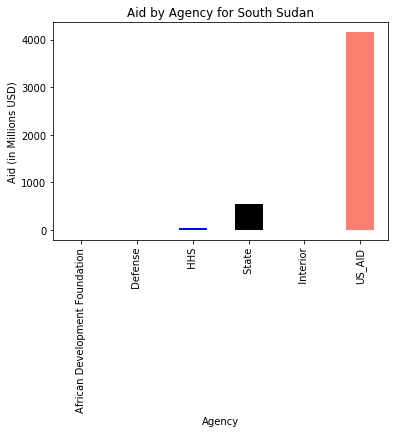

Syria


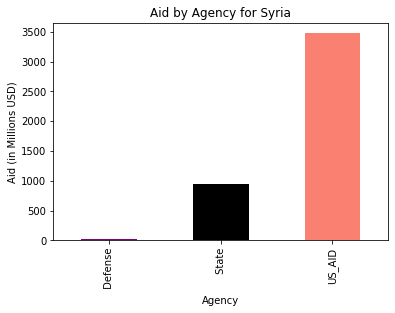

Indonesia


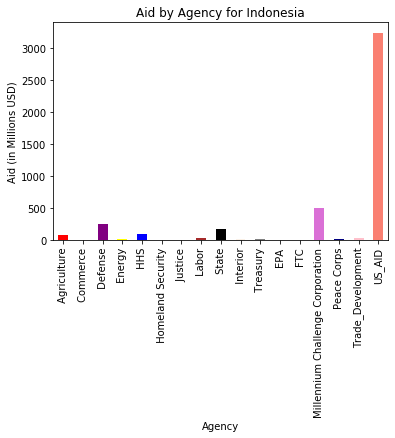

Zambia


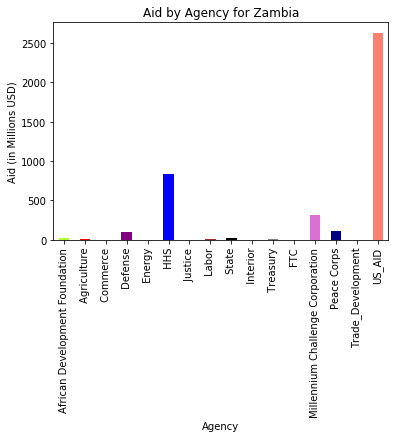

Ukraine


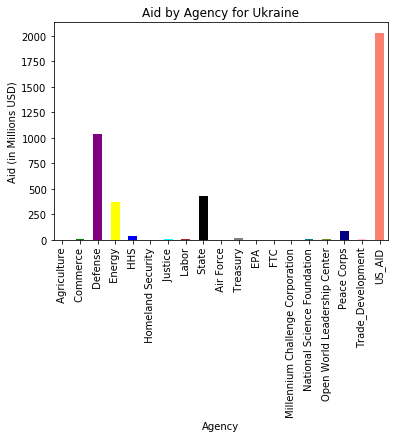

Philippines


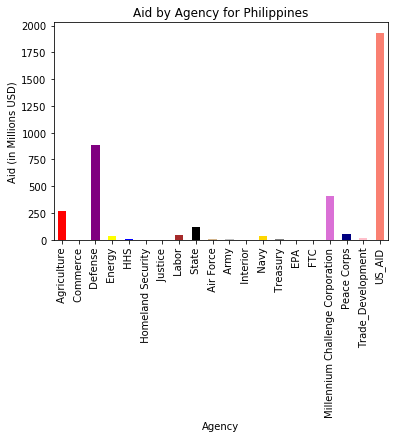

Somalia


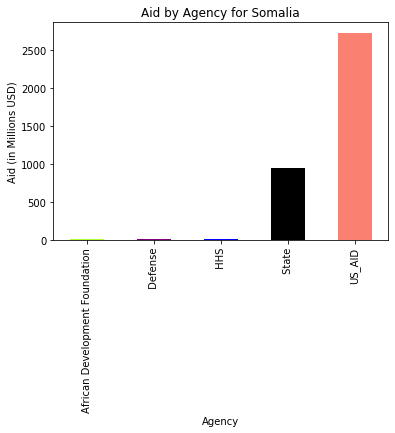

Latin America and Caribbean Region


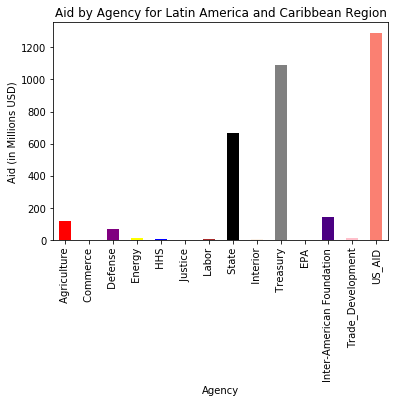

Bangladesh


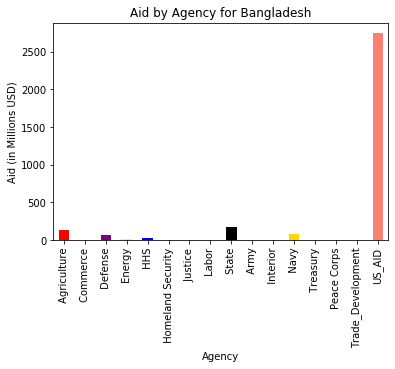

Georgia


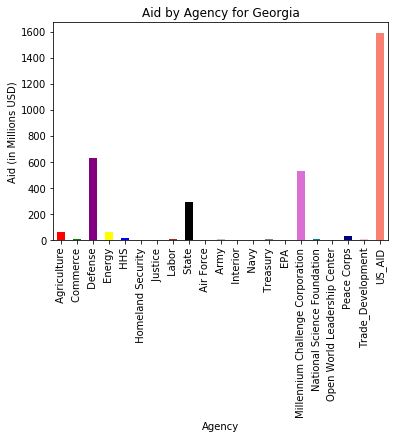

Lebanon


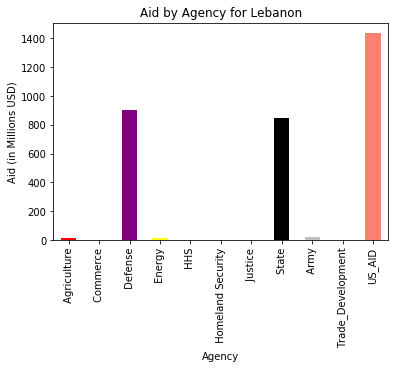

Liberia


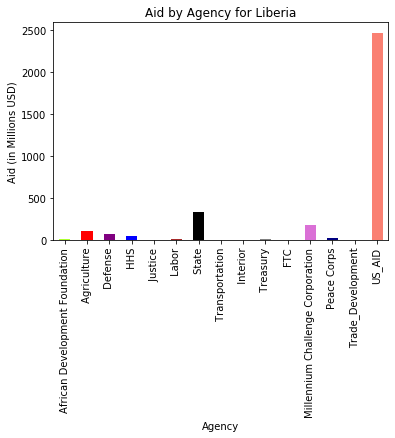

Mexico


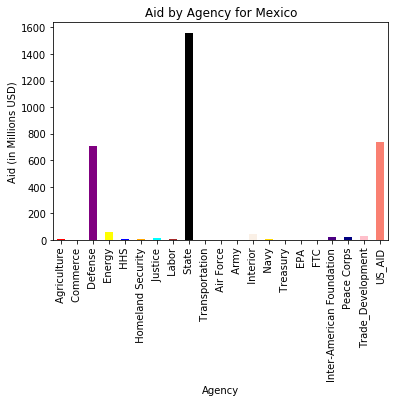

Malawi


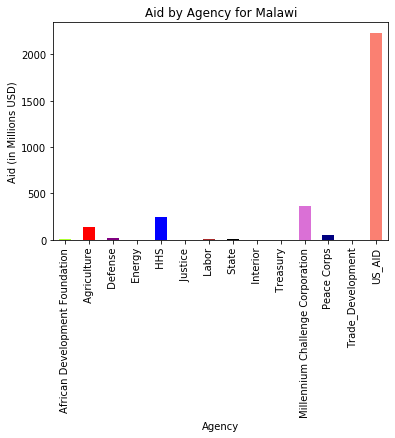

Poland


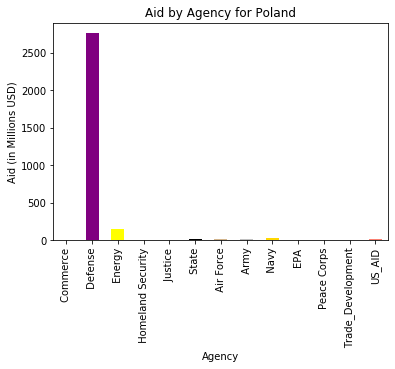

Peru


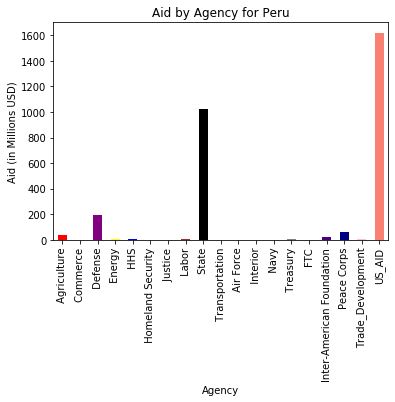

Asia Region


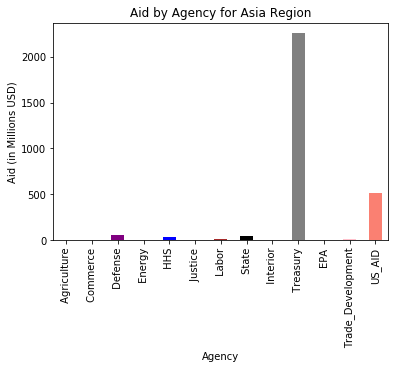

Yemen


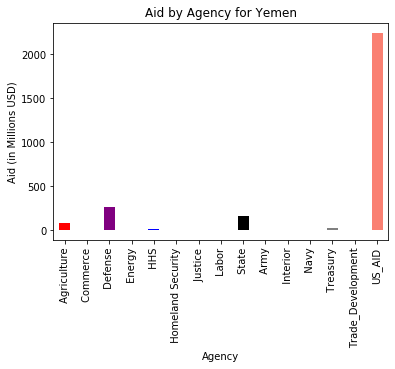

Ghana


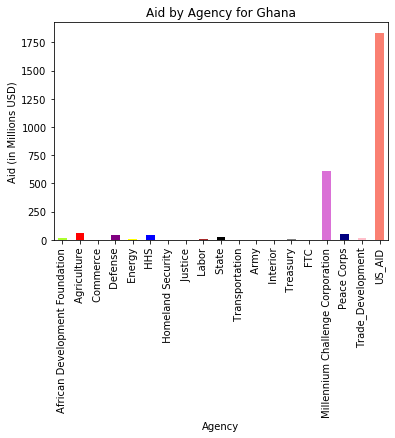

Mali


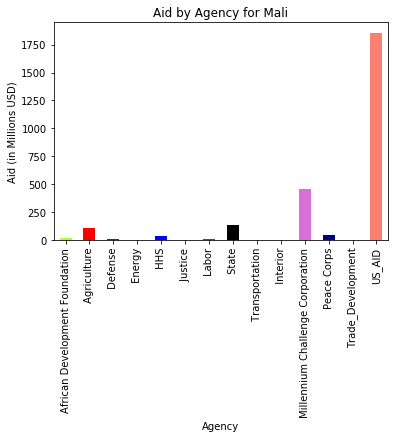

India


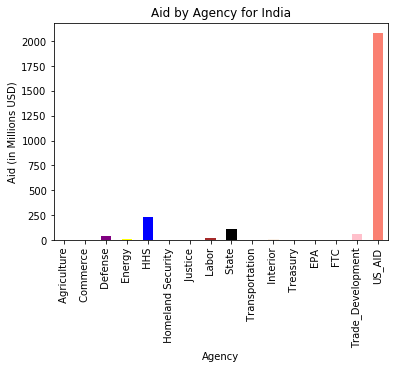

Zimbabwe


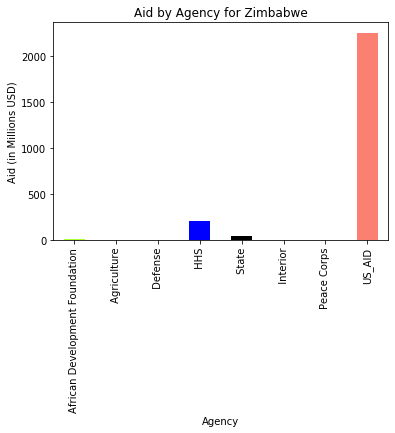

Senegal


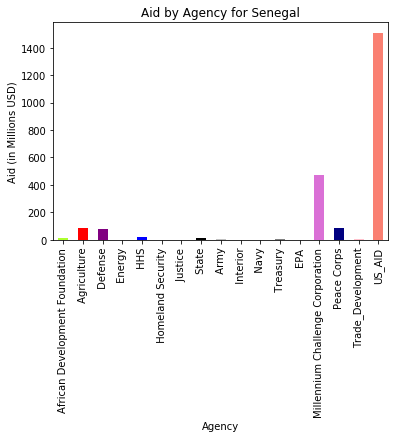

Guatemala


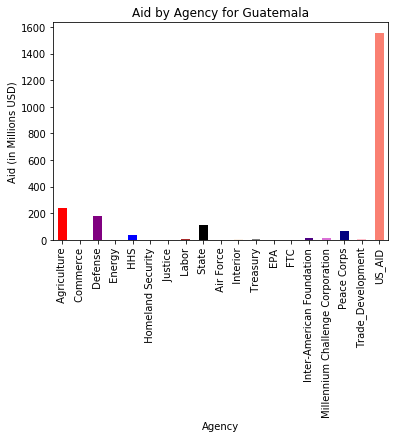

Rwanda


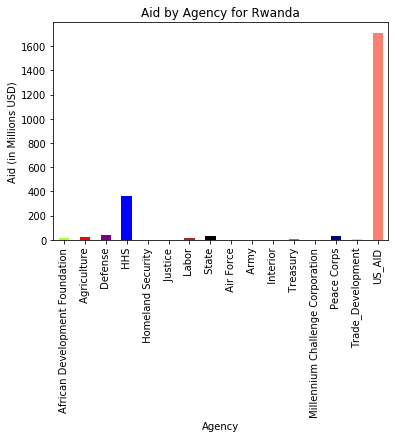

El Salvador


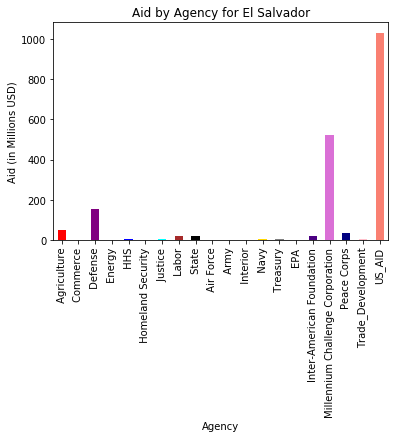

Honduras


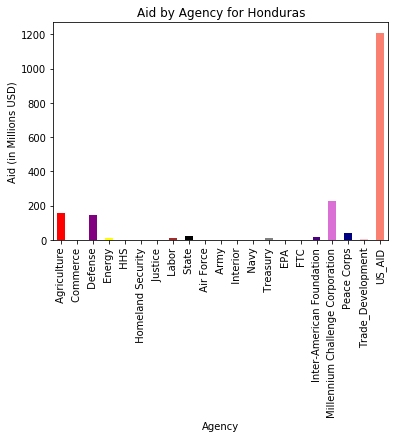

Bolivia


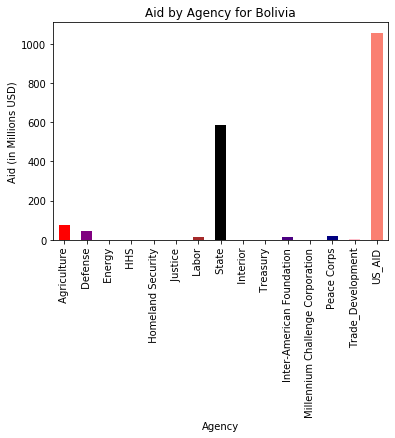

In [18]:
for country in view_list:
    plot_aid_by_agency(country)


In [19]:
gdp_df = gdp.copy(deep = True)
gdp_df = gdp_df.fillna(0) #Fill in all na values with 0
gdp_df.head()

Country Name Country Code     Indicator Name  Indicator Code         1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD          0.0   
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  537777811.0   
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD          0.0   
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD          0.0   
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD          0.0   

          1961         1962         1963         1964          1965  ...  \
0          0.0          0.0          0.0          0.0  0.000000e+00  ...   
1  548888896.0  546666678.0  751111191.0  800000044.0  1.006667e+09  ...   
2          0.0          0.0          0.0          0.0  0.000000e+00  ...   
3          0.0          0.0          0.0          0.0  0.000000e+00  ...   
4          0.0          0.0          0.0          0.0  0.000000e+00  ...   

           2008          2009          2010          2011          2012  \
0  2.791961e+09  2.498933e+09  2.467704e+09  2.584464e+09  0.000000e+00   
1  1.019053e+10  1.248694e+10  1.593680e+10  1.793024e+10  2.053654e+10   
2  8.417803e+10  7.549238e+10  8.247091e+10  1.040000e+11  1.150000e+11   
3  1.288135e+10  1.204421e+10  1.192695e+10  1.289087e+10  1.231978e+10   
4  4.007353e+09  3.660531e+09  3.355695e+09  3.442063e+09  3.164615e+09   

           2013          2014          2015          2016  2017  
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.0  
1  2.004633e+10  2.005019e+10  1.921556e+10  1.946902e+10   0.0  
2  1.250000e+11  1.270000e+11  1.030000e+11  9.533511e+10   0.0  
3  1.277628e+10  1.322824e+10  1.133526e+10  1.186387e+10   0.0  
4  3.281585e+09  3.350736e+09  2.811489e+09  2.858518e+09   0.0  

[5 rows x 62 columns]

In [20]:
# Drop unnessary columns
gdp_df = gdp_df.drop('Country Code', 1)
gdp_df = gdp_df.drop('Indicator Name', 1)
gdp_df = gdp_df.drop('Indicator Code', 1)


In [21]:
gdp_df.head()

Country Name         1960         1961         1962         1963  \
0        Aruba          0.0          0.0          0.0          0.0   
1  Afghanistan  537777811.0  548888896.0  546666678.0  751111191.0   
2       Angola          0.0          0.0          0.0          0.0   
3      Albania          0.0          0.0          0.0          0.0   
4      Andorra          0.0          0.0          0.0          0.0   

          1964          1965          1966          1967          1968  ...  \
0          0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
1  800000044.0  1.006667e+09  1.400000e+09  1.673333e+09  1.373333e+09  ...   
2          0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
3          0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   
4          0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  ...   

           2008          2009          2010          2011          2012  \
0  2.791961e+09  2.498933e+09  2.467704e+09  2.584464e+09  0.000000e+00   
1  1.019053e+10  1.248694e+10  1.593680e+10  1.793024e+10  2.053654e+10   
2  8.417803e+10  7.549238e+10  8.247091e+10  1.040000e+11  1.150000e+11   
3  1.288135e+10  1.204421e+10  1.192695e+10  1.289087e+10  1.231978e+10   
4  4.007353e+09  3.660531e+09  3.355695e+09  3.442063e+09  3.164615e+09   

           2013          2014          2015          2016  2017  
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.0  
1  2.004633e+10  2.005019e+10  1.921556e+10  1.946902e+10   0.0  
2  1.250000e+11  1.270000e+11  1.030000e+11  9.533511e+10   0.0  
3  1.277628e+10  1.322824e+10  1.133526e+10  1.186387e+10   0.0  
4  3.281585e+09  3.350736e+09  2.811489e+09  2.858518e+09   0.0  

[5 rows x 59 columns]

In [22]:
# Convert DataFrame to be able to merge
gdp_df = gdp_df.melt(id_vars =['Country Name'],\
             var_name =['year'], value_name = 'Value')
gdp_df.head()

Country Name  year        Value
0        Aruba  1960          0.0
1  Afghanistan  1960  537777811.0
2       Angola  1960          0.0
3      Albania  1960          0.0
4      Andorra  1960          0.0

In [23]:
gdp_clean = gdp_df

In [24]:
# set year as int and Value as float
gdp_clean.year = gdp_clean.year.astype(int)
gdp_clean.Value = gdp_clean.Value.astype(float)

In [25]:
# Only use data pass 2001 and rename column to be the same as other DataFrame
gdp_clean = gdp_clean[gdp_clean['year'] > 2001]
gdp_clean = gdp_clean.rename(columns ={'Country Name': 'country_name'})
gdp_clean.head()

country_name  year         Value
11088        Aruba  2002  1.941095e+09
11089  Afghanistan  2002  4.128821e+09
11090       Angola  2002  1.249735e+10
11091      Albania  2002  4.435079e+09
11092      Andorra  2002  1.733117e+09

In [26]:
# Set group and set index to be able to merge the data
gdp_clean = gdp_clean.groupby(['country_name', 'year']).agg({'Value': 'mean'}).reset_index()

In [27]:
# Merge all four dataframes
combined_all = pd.merge(gdp_clean, combined_df_complete, how = 'right', on = ['country_name', 'year'])
combined_all.head()

country_name  year         Value Code    HDI       US_Aid  WorldBank_Aid
0  Afghanistan  2002  4.128821e+09  AFG  0.373   400.296704          100.0
1  Afghanistan  2003  4.583644e+09  AFG  0.383   703.345174          403.2
2  Afghanistan  2004  5.285466e+09  AFG  0.398  1240.018125          250.0
3  Afghanistan  2005  6.275074e+09  AFG  0.408  1661.363694          220.0
4  Afghanistan  2006  7.057598e+09  AFG  0.417  3357.300934          280.0

In [28]:
# Get total aid by us and world into a new column and divide Value number to be something seeable
combined_all['Total_Aid'] = combined_all['US_Aid'] + combined_all['WorldBank_Aid']
combined_all['Value'] = combined_all['Value']/1000000

In [29]:
combined_all.head()

country_name  year        Value Code    HDI       US_Aid  WorldBank_Aid  \
0  Afghanistan  2002  4128.820723  AFG  0.373   400.296704          100.0   
1  Afghanistan  2003  4583.644246  AFG  0.383   703.345174          403.2   
2  Afghanistan  2004  5285.465686  AFG  0.398  1240.018125          250.0   
3  Afghanistan  2005  6275.073572  AFG  0.408  1661.363694          220.0   
4  Afghanistan  2006  7057.598407  AFG  0.417  3357.300934          280.0   

     Total_Aid  
0   500.296704  
1  1106.545174  
2  1490.018125  
3  1881.363694  
4  3637.300934

In [30]:
# Delete all rows that have 'Nan', 'inf', and 0 to do regression analysis
combined_all_clean = combined_all.dropna(axis = 0, how = 'any')
combined_all_clean = combined_all_clean.ix[~(combined_all_clean['Value'] == 0.00)]
combined_all_clean = combined_all_clean.ix[~(combined_all_clean['HDI'] == 0.00)]
combined_all_clean = combined_all_clean.ix[~(combined_all_clean['US_Aid'] == 0.00)]
combined_all_clean = combined_all_clean.ix[~(combined_all_clean['WorldBank_Aid'] == 0.00)]
combined_all_clean = combined_all_clean.ix[~(combined_all_clean['Value'] == 'inf')]
combined_all_clean.loc[combined_all_clean['country_name'] == 'Iraq']

C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-do

country_name  year          Value Code    HDI       US_Aid  WorldBank_Aid  \
211         Iraq  2005   49954.890353  IRQ  0.631  8553.788930         100.00   
212         Iraq  2006   65140.293688  IRQ  0.636  8118.271453         175.00   
213         Iraq  2007   88840.050497  IRQ  0.638  7496.108226         124.00   
214         Iraq  2008  132000.000000  IRQ  0.643  7125.328416         109.50   
216         Iraq  2010  139000.000000  IRQ  0.649  3667.212013         250.00   
219         Iraq  2013  235000.000000  IRQ  0.666   988.042985         355.00   
221         Iraq  2015  180000.000000  IRQ  0.668  1371.735633        1550.00   
222         Iraq  2016  171000.000000  IRQ  0.672  4256.991847        1485.32   

       Total_Aid  
211  8653.788930  
212  8293.271453  
213  7620.108226  
214  7234.828416  
216  3917.212013  
219  1343.042985  
221  2921.735633  
222  5742.311847

In [31]:
import statsmodels. api as sm
y = combined_all_clean['HDI']
X = combined_all_clean[['WorldBank_Aid','Value', 'US_Aid']]
X = sm.add_constant(X)
model11 = sm.OLS(y, X).fit()
model11.summary()

C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     12.30
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           1.19e-07
Time:                        15:52:32   Log-Likelihood:                 243.89
No. Observations:                 339   AIC:                            -479.8
Df Residuals:                     335   BIC:                            -464.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5381      0.008     66.197      0.000       0.522       0.554
WorldBank_Aid  6.694e-06   1.15e-05      0.584      0.559   -1.58e-05    2.92e-05
Value          1.012e-07    3.1e-08      3.261      0.001    4.02e-08    1.62e-07
US_Aid        -2.188e-06   4.02e-06     -0.545      0.586   -1.01e-05    5.71e-06
==============================================================================
Omnibus:                       45.026   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.035
Skew:                           0.402   Prob(JB):                     4.46e-05
Kurtosis:                       2.122   Cond. No.                     4.63e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# def clean(row):
#     if 'inf' in str(row):
#         drop row
#     elif 'NaN' in str(row):
#         return 0
#     else:
#         return row
    


In [33]:
# Create a pivot table to be able to calculate the % change in HDI for each individual country
combined_changed_HDI = combined_all.pivot(index = 'year', columns = 'country_name', values = 'HDI')
combined_changed_HDI.fillna(0)

country_name  Afghanistan  Bangladesh  Bolivia  Colombia  Egypt  El Salvador  \
year                                                                           
2001                0.000       0.477    0.611     0.656  0.616        0.620   
2002                0.373       0.483    0.617     0.658  0.620        0.628   
2003                0.383       0.490    0.621     0.657  0.622        0.635   
2004                0.398       0.497    0.622     0.671  0.628        0.643   
2005                0.408       0.505    0.624     0.683  0.634        0.651   
2006                0.417       0.513    0.630     0.691  0.642        0.659   
2007                0.429       0.520    0.631     0.704  0.650        0.656   
2008                0.437       0.523    0.640     0.710  0.658        0.659   
2009                0.453       0.535    0.647     0.715  0.660        0.659   
2010                0.463       0.545    0.649     0.719  0.665        0.671   
2011                0.471       0.557    0.655     0.725  0.668        0.666   
2012                0.482       0.567    0.662     0.725  0.675        0.670   
2013                0.487       0.575    0.668     0.735  0.680        0.671   
2014                0.491       0.583    0.675     0.738  0.683        0.670   
2015                0.493       0.592    0.681     0.742  0.691        0.674   
2016                0.494       0.597    0.689     0.747  0.694        0.679   
2017                0.498       0.608    0.693     0.747  0.696        0.674   

country_name  Ethiopia  Georgia  Ghana  Guatemala  ...  Senegal  South Africa  \
year                                               ...                          
2001             0.298    0.678  0.483      0.554  ...    0.395         0.610   
2002             0.306    0.684  0.489      0.560  ...    0.400         0.617   
2003             0.310    0.693  0.490      0.564  ...    0.407         0.615   
2004             0.325    0.701  0.498      0.567  ...    0.415         0.613   
2005             0.346    0.712  0.509      0.571  ...    0.422         0.614   
2006             0.362    0.718  0.519      0.579  ...    0.427         0.616   
2007             0.378    0.730  0.530      0.590  ...    0.436         0.621   
2008             0.394    0.728  0.542      0.598  ...    0.445         0.633   
2009             0.401    0.731  0.547      0.604  ...    0.449         0.642   
2010             0.412    0.735  0.554      0.611  ...    0.456         0.649   
2011             0.423    0.741  0.563      0.619  ...    0.467         0.657   
2012             0.430    0.750  0.570      0.613  ...    0.476         0.664   
2013             0.438    0.757  0.577      0.616  ...    0.481         0.675   
2014             0.445    0.765  0.576      0.643  ...    0.486         0.685   
2015             0.451    0.771  0.585      0.645  ...    0.492         0.692   
2016             0.457    0.776  0.588      0.649  ...    0.499         0.696   
2017             0.463    0.780  0.592      0.650  ...    0.505         0.699   

country_name  South Sudan  Syria  Tanzania  Uganda  Ukraine  Yemen  Zambia  \
year                                                                         
2001                0.000  0.597     0.403   0.406    0.681  0.450   0.440   
2002                0.000  0.000     0.413   0.421    0.689  0.456   0.449   
2003                0.000  0.610     0.423   0.430    0.699  0.463   0.460   
2004                0.000  0.623     0.434   0.430    0.706  0.469   0.469   
2005                0.000  0.635     0.448   0.437    0.715  0.474   0.480   
2006                0.000  0.643     0.458   0.449    0.721  0.479   0.492   
2007                0.000  0.649     0.468   0.459    0.729  0.482   0.503   
2008                0.000  0.646     0.477   0.470    0.733  0.485   0.517   
2009                0.000  0.648     0.486   0.477    0.727  0.491   0.533   
2010                0.413  0.644     0.493   0.486    0.733  0.498   0.544   
201

In [34]:
# Get the last row and the row for 2002 to calculate the total percentage change from 2002 to 2017
combined_changed_percent_HDI = ((combined_changed_HDI.iloc[16, :] - combined_changed_HDI.iloc[1, :])\
                                / combined_changed_HDI.iloc[1, :]) * 100

In [35]:
#Convert gdp into a pivot table to be able to find % Change
combined_changed_gdp = combined_all.pivot(index = 'year', columns = 'country_name', values = 'Value')
combined_changed_gdp.fillna(0)

country_name   Afghanistan     Bangladesh       Bolivia       Colombia  Egypt  \
year                                                                            
2001              0.000000       0.000000      0.000000       0.000000    0.0   
2002           4128.820723   54724.081491   7905.485216   97933.391976    0.0   
2003           4583.644246   60158.929188   8082.364868   94684.584163    0.0   
2004           5285.465686   65108.544250   8773.451739  117000.000000    0.0   
2005           6275.073572   69442.943089   9549.077869  147000.000000    0.0   
2006           7057.598407   71819.083684  11451.869165  163000.000000    0.0   
2007           9843.842455   79611.888213  13120.159976  207000.000000    0.0   
2008          10190.529882   91631.278239  16674.324634  244000.000000    0.0   
2009          12486.943506  102000.000000  17339.992165  234000.000000    0.0   
2010          15936.800636  115000.000000  19649.631308  287000.000000    0.0   
2011          17930.239400  129000.000000  23963.033444  335000.000000    0.0   
2012          20536.542737  133000.000000  27084.497540  370000.000000    0.0   
2013          20046.334304  150000.000000  30659.338929  380000.000000    0.0   
2014          20050.189882  173000.000000  32996.187988  378000.000000    0.0   
2015          19215.562179  195000.000000  33000.198263  292000.000000    0.0   
2016          19469.022208  221000.000000  33806.395514  282000.000000    0.0   
2017              0.000000       0.000000      0.000000       0.000000    0.0   

country_name  El Salvador      Ethiopia       Georgia         Ghana  \
year                                                                  
2001                 0.00      0.000000      0.000000      0.000000   
2002             14306.70   7850.809498   3395.778674   6166.330136   
2003             15046.70   8623.691300   3991.374549   7632.406553   
2004             15798.30  10131.187261   5125.273881   8881.368538   
2005             17093.80  12401.139454   6410.941013  10731.634117   
2006             18550.70  15280.861835   7745.406201  20409.257610   
2007             20104.90  19707.616773  10172.869680  24758.819718   
2008             21430.95  27066.912635  12795.044473  28526.891010   
2009             20661.03  32437.389116  10766.809099  25977.847814   
2010             21418.33  29933.790334  11638.536834  32174.772956   
2011             23139.04  31952.763089  14434.619982  39566.292433   
2012             23813.60  43310.721414  15846.474596  41939.728979   
2013             24350.93  47648.211133  16140.047012  47805.069495   
2014             25054.23  55612.228234  16509.305828  38616.536132   
2015             26052.34  64464.547915  13993.546732  37543.361204   
2016             26797.47  72374.224249  14378.016729  42689.783734   
2017                 0.00      0.000000      0.000000      0.000000   

country_name     Guatemala  ...       Senegal  South Africa   South Sudan  \
year                        ...                                             
2001              0.000000  ...      0.000000           0.0      0.000000   
2002          20776.669467  ...   5333.862371      116000.0      0.000000   
2003          21917.706491  ...   6858.952880      175000.0      0.000000   
2004          23965.275996  ...   8031.344381      229000.0      0.000000   
2005          27211.377225  ...   8707.015771      258000.0      0.000000   
2006          30231.249362  ...   9358.710935      272000.0      0.000000   
2007          34113.107086  ...  11284.603071      299000.0      0.000000   
2008          39136.893345  ...  13439.023281      287000.0      0.000000   
2009          37733.994976  ...  12814.961485      297000.0      0.000000   
2010          41338.595381  ...  12948.906289      375000.0  15727.363443   
2011          47654.841113  ...  14390.776644      417000.0  17826.697892   
2012          50388.454861  ...  14225.310519      396000.0  10368.813559   
2013          53851.058955  ... 

In [36]:
# Do calculation to find % change for each country by gdp
combined_changed_percent_gdp = ((combined_changed_gdp.iloc[15, :] - combined_changed_gdp.iloc[1, :])\
                                / combined_changed_gdp.iloc[1, :]) * 100

In [37]:
# Create a new dataframe to show total aid with the change in average % change in GDP and total % change in HDI

country_total = combined_all.groupby(['country_name'])['Total_Aid'].sum()
country_df = pd.DataFrame( {'Total_Aid': country_total,
                            'Average_Percentage_Change_GDP': combined_changed_percent_gdp,
                            'Percent_HDI_Change': combined_changed_percent_HDI})
country_df = country_df.sort_values('Total_Aid', ascending = False)
country_df = country_df.iloc[0:10]

country_df

Total_Aid  Average_Percentage_Change_GDP  Percent_HDI_Change
country_name                                                                 
Afghanistan   97313.151456                     371.539539           33.512064
Iraq          62417.520637                            inf           11.201299
India         57135.441063                     344.881890           26.984127
Pakistan      35566.630384                     285.855717           20.860215
Indonesia     29974.278424                     348.076923           12.297735
Colombia      25218.864127                     187.950815           13.525836
Bangladesh    20961.140209                     303.844147           25.879917
Kenya         16451.673788                     436.434351           29.385965
Ukraine       13136.655040                     120.014408            8.998549
Poland        12318.514011                     136.683417            8.260325

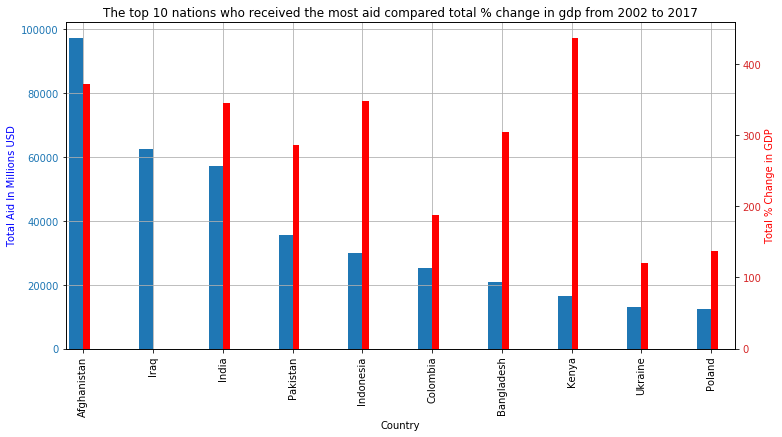

In [38]:
# Plot total aid versus total %  change in gdp
fig, ax = plt.subplots(figsize = (12, 6))
ax2 = ax.twinx()
width = 0.2
country_df.Total_Aid.plot(kind = 'bar', color = 'tab:blue', ax = ax, width = width, position = 1, grid = True)
country_df.Average_Percentage_Change_GDP.plot(kind = 'bar', color = 'red', ax = ax2, width = .1, position = 0)

ax.set_xlabel('Country')
ax.set_ylabel('Total Aid In Millions USD', color = 'blue')
ax2.set_ylabel('Total % Change in GDP', color = 'red')

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('The top 10 nations who received the most aid compared total % change in gdp from 2002 to 2017')
plt.show()

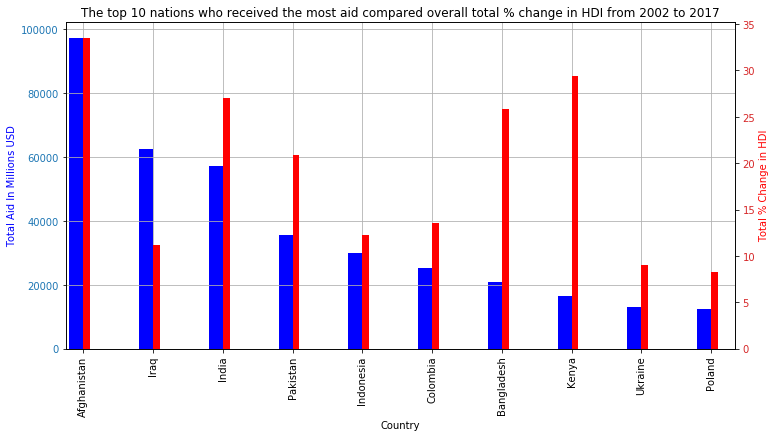

In [39]:
# Plot total aid with total % change in HDI

fig, ax = plt.subplots(figsize = (12, 6))

ax2 = ax.twinx()
width = 0.2

country_df.Total_Aid.plot(kind = 'bar', color = 'blue', ax = ax, width = width, position = 1, grid = True)
country_df.Percent_HDI_Change.plot(kind = 'bar', color = 'red', ax = ax2, width = .1, position = 0)

ax.set_xlabel('Country')
ax.set_ylabel('Total Aid In Millions USD', color = 'blue')
ax2.set_ylabel('Total % Change in HDI', color = 'red')

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('The top 10 nations who received the most aid compared overall total % change in HDI from 2002 to 2017')
plt.show()

NameError: name 'axes' is not defined

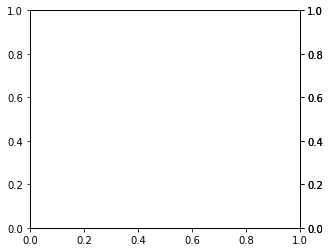

In [40]:
fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
ax = ax
ax2 = ax.twinx()
ax3 = ax.twinx()

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

country_df.Total_Aid.plot(kind = 'bar', color = 'blue', ax = ax, width = width, position = 1, grid = True)
country_df.Percent_HDI_Change.plot(kind = 'bar', color = 'red', ax = ax2, width = .1, position = 0)

ax.set_xlabel('Country')
ax.set_ylabel('Total Aid In Millions USD', color = 'blue')
ax2.set_ylabel('Total % Change in HDI', color = 'red')

ax.tick_params(axis='y', labelcolor='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.title('The top 10 nations who received the most aid compared overall total % change in HDI from 2002 to 2017')
plt.show()

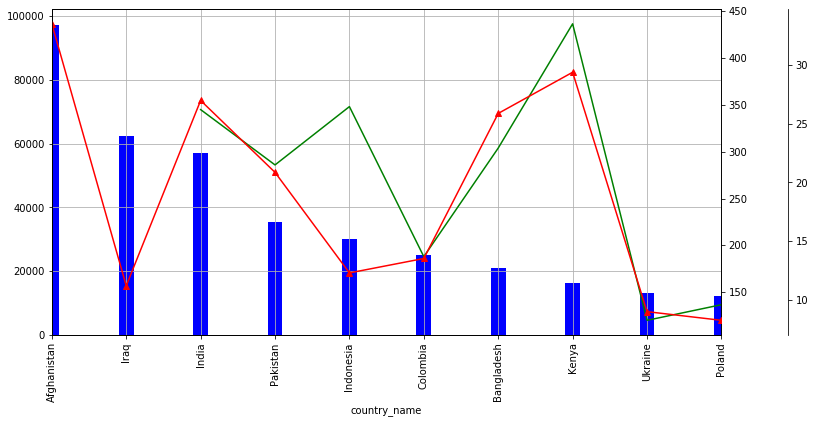

In [41]:
fig, ax = plt.subplots(figsize = (12,6))

# Twin the x-axis twice to make independent y-axes.
ax = ax
ax2 = ax.twinx()
ax3 = ax.twinx()

ax3.spines['right'].set_position(('axes', 1.1))
# make_patch_spines_invisible(ax3)
ax3.spines['right'].set_visible(True)

country_df.Total_Aid.plot(kind = 'bar', color = 'blue', ax = ax, width = .2,  grid = True)
country_df.Percent_HDI_Change.plot(kind = 'line', style = 'r-^', ax = ax3)
country_df.Average_Percentage_Change_GDP.plot(kind = 'line', color = 'green', ax = ax2)


In [42]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
from mpl_toolkits.basemap import Basemap
concap = pd.read_csv('world-capitals-gps.csv')
concap.head()

CountryName        CapitalName  \
0                                Somaliland           Hargeisa   
1  South Georgia and South Sandwich Islands  King Edward Point   
2       French Southern and Antarctic Lands  Port-aux-Français   
3                                 Palestine          Jerusalem   
4                             Aland Islands          Mariehamn   

   CapitalLatitude  CapitalLongitude CountryCode ContinentName  
0         9.550000         44.050000         NaN        Africa  
1       -54.283333        -36.500000          GS    Antarctica  
2       -49.350000         70.216667          TF    Antarctica  
3        31.766667         35.233333          PS          Asia  
4        60.116667         19.900000          AX        Europe

In [60]:
def reg(x):
    if x=='Russia':
        res = 'Russian Federation'
    else:
        res=x
    return res
concap['CountryName'] = concap['CountryName'].apply(reg)


In [71]:
concap = concap.drop(['ContinentName', 'CapitalName', 'CountryCode'], axis = 1)
concap.head()

country_name  CapitalLatitude  CapitalLongitude
0                                Somaliland         9.550000         44.050000
1  South Georgia and South Sandwich Islands       -54.283333        -36.500000
2       French Southern and Antarctic Lands       -49.350000         70.216667
3                                 Palestine        31.766667         35.233333
4                             Aland Islands        60.116667         19.900000

In [72]:
concap = concap.rename(columns = {'CountryName': 'country_name'})
concap.head()

country_name  CapitalLatitude  CapitalLongitude
0                                Somaliland         9.550000         44.050000
1  South Georgia and South Sandwich Islands       -54.283333        -36.500000
2       French Southern and Antarctic Lands       -49.350000         70.216667
3                                 Palestine        31.766667         35.233333
4                             Aland Islands        60.116667         19.900000

In [109]:
len(country_total)

41

In [116]:
country_total = pd.DataFrame(country_total)
country_total['Total_Aid'].sort_values(ascending = False)


country_name
Afghanistan     97313.151456
Iraq            62417.520637
India           57135.441063
Pakistan        35566.630384
Indonesia       29974.278424
Colombia        25218.864127
Bangladesh      20961.140209
Kenya           16451.673788
Ukraine         13136.655040
Poland          12318.514011
Uganda          11468.445326
Peru            10885.989594
Mozambique       9029.903260
Ghana            8589.312315
South Africa     7428.736861
Haiti            6512.272906
Georgia          5342.504078
Zambia           5236.683768
Malawi           5005.498347
Yemen            4984.386273
Rwanda           4753.286974
Senegal          4718.024858
Guatemala        4488.825041
Mali             4090.895752
Liberia          4010.706456
South Sudan      3330.720808
Honduras         2661.051763
El Salvador      2454.253502
Zimbabwe         1592.940149
Nigeria             0.000000
Mexico              0.000000
Lebanon             0.000000
Israel              0.000000
Syria               0.000000
E

In [82]:
aid_by_country = pd.merge(country_total, concap, on = 'country_name', how = 'right')

In [83]:
aid_by_country.head()

country_name     Total_Aid  CapitalLatitude  CapitalLongitude
0  Afghanistan  97313.151456        34.516667         69.183333
1   Bangladesh  20961.140209        23.716667         90.400000
2      Bolivia      0.000000       -16.500000        -68.150000
3     Colombia  25218.864127         4.600000        -74.083333
4        Egypt      0.000000        30.050000         31.250000

In [113]:
aid_by_country.describe()

Total_Aid  CapitalLatitude  CapitalLongitude
count     40.000000       245.000000        245.000000
mean   11926.957679        17.335901         12.905790
std    19940.492155        25.739778         72.941443
min        0.000000       -54.283333       -175.200000
25%        0.000000         0.316667        -36.500000
50%     4868.836623        16.700000         15.300000
75%    11680.962497        38.883333         45.333333
max    97313.151456        78.216667        179.216667

C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kiet\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


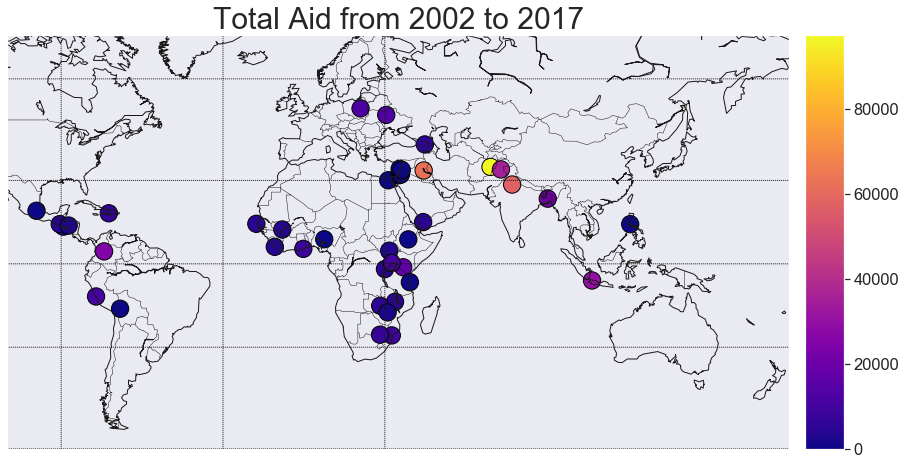

In [112]:
def mapWorld(col1,size2,title3,label4,metr=100,colmap='hot'):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,\
            llcrnrlon=-110,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = aid_by_country['CapitalLatitude'].values
    lon = aid_by_country['CapitalLongitude'].values
    a_1 = aid_by_country[col1].values
    if size2:
        a_2 = aid_by_country[size2].values
    else: a_2 = 1
    m.scatter(lon, lat, latlon=True,c=a_1,s=metr*a_2,linewidth=1,edgecolors='black',cmap=colmap, alpha=1)
    
    cbar = m.colorbar()
    cbar.set_label(label4,fontsize=30)
    plt.title(title3, fontsize=30)
    plt.show()
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
mapWorld(col1='Total_Aid', size2=False,title3='Total Aid from 2002 to 2017',label4='',metr=300,colmap='plasma')

In [117]:
tables = pd.read_html('https://www.disabled-world.com/calculators-charts/wpc.php')

In [133]:
tables = tables[0]

In [134]:
tables

0      Most Populated Continents (2016)            ...
1        World Population Chart by Country (2017)  ...
Name: 0, dtype: object